In [2]:
import Pkg;
Pkg.activate(".")
include("HenryLib.jl")

  Activating project at `c:\Users\henhen724\Desktop\LabNotebooks\DickeModel\analysis`


make_white_noise (generic function with 1 method)

In [20]:
Nspin=100_000
dt = (2.0)^(-9)
tout_course = nothing
seeds = 3000:3100
tmax = 50000.0
Tfilt = 100.0
λ0 = 0.5
seedIndx = 4

prob, full_cb, tspan, out, CurrW = dicke_hetrodyne_atom_only_meanfield_prob(;Nspin=Nspin, κ=2π * 1.0, Δc=-2π * 80, ωz=2π * 0.01, λ0=λ0, t_ramp=600.0, t_hold=0.0, λmod=0.0, ωmod=2π * 1e-6 * 500.0, tmax=tmax, recordtimes=2000, save_noise=true)
seed = seeds[seedIndx]
sol1 = solve(prob, RKMilGeneral(;ii_approx=IICommutative());
                    adaptive=false,
                    dt=dt,
                    save_everystep=false,
                    save_start=false,
                    save_end=false,
                    saveat=tspan,
                callback=full_cb, seed=seed)
vec_t = copy(out.saveval)
tout = copy(out.t);
Q = map(x->real(x[4]), vec_t)
values_05 = exp_filter(Q/Tfilt, Tfilt, tout[2]-tout[1]) .- Q/Tfilt


2000-element Vector{Float64}:
  0.0
 -0.010829500048718875
 -0.007121684342475738
 -0.04269429960287298
 -0.047920969663609744
  0.018083611564766195
  0.033985872801762976
  0.026001803508532453
  0.013003264523422643
 -0.003220359568258691
  ⋮
 -0.00955275849265802
 -0.05776335033131508
 -0.023480022489899
 -0.07691478541810715
 -0.07117514189688445
 -0.02202241217460177
 -0.007765578821447239
 -0.003937291181072
  0.03980072462941098

In [21]:
Nspin=100_000
dt = (2.0)^(-9)
tout_course = nothing
seeds = 3000:3100
tmax = 50000.0
Tfilt = 100.0
λ0 = 0.95
seedIndx = 6

prob, full_cb, tspan, out, CurrW = dicke_hetrodyne_atom_only_meanfield_prob(;Nspin=Nspin, κ=2π * 1.0, Δc=-2π * 80, ωz=2π * 0.01, λ0=λ0, t_ramp=600.0, t_hold=0.0, λmod=0.0, ωmod=2π * 1e-6 * 500.0, tmax=tmax, recordtimes=2000, save_noise=true)
seed = seeds[seedIndx]
sol1 = solve(prob, RKMilGeneral(;ii_approx=IICommutative());
                    adaptive=false,
                    dt=dt,
                    save_everystep=false,
                    save_start=false,
                    save_end=false,
                    saveat=tspan,
                callback=full_cb, seed=seed)
vec_t = copy(out.saveval)
tout = copy(out.t);
Q = map(x->real(x[4]), vec_t)
values_95 = exp_filter(Q/Tfilt, Tfilt, tout[2]-tout[1]) .- Q/Tfilt


2000-element Vector{Float64}:
  0.0
  0.04866003076892258
  0.023332485336667937
  0.05238688859134727
  0.034088053690003714
  0.02543295257952636
  0.005560151030700233
  0.037904641999669045
  0.025966766931529786
  0.0870562812823392
  ⋮
  0.08833397248962171
  0.026416469355113215
 -0.03534010469485338
 -0.0888112502922973
 -0.1070492970560668
 -0.12803918462138952
 -0.1201234882953015
 -0.05463145507012346
  0.011396192850090525

In [47]:
using Plots, LaTeXStrings
# Create histogram of filtered values
# Find common bin edges across both datasets
min_edge = min(minimum(values_05), minimum(values_95))
max_edge = max(maximum(values_05), maximum(values_95))
bins = range(min_edge, max_edge, length=51) # 51 edges gives 50 bins

histogram(values_95, bins=bins, normalize=true,
    label=L"\lambda/ \lambda_c = 0.95",
    alpha=0.5)
    
histogram!(values_05, bins=bins, normalize=true, 
    xlabel="Time Filtered Heterodyne Current",
    ylabel="Probability Density",
    label=L"\lambda/ \lambda_c = 0.5",
    title="Histogram of Single Trajectory Heterodyne Current",
    alpha=0.5, dpi=300)

# Add text box with std and RAD differences
std_diff = abs(std(values_95) - std(values_05))
rad_diff = abs(rescaled_autodensity!(values_95) - rescaled_autodensity!(values_05))

annotate!(minimum(bins), 10,
    text("Δσ = $(round(std_diff, digits=3))\nΔRAD = $(round(rad_diff, digits=3))",
        :left, :top, 16))

# Save the current plot as a PNG file
savefig("figures/heterodyne_current_histogram.png")

"c:\\Users\\henhen724\\Desktop\\LabNotebooks\\DickeModel\\analysis\\figures\\heterodyne_current_histogram.png"

In [ ]:
# Calculate histogram statistics for both distributions
using Polynomials
hist_05 = Polynomials.fit(bins[1:end-1], density_05.weights, 1)
hist_95 = Polynomials.fit(bins[1:end-1], density_95.weights, 1)

# Get normalized counts (probability density)
density_05 = normalize(hist_05, mode=:pdf)
density_95 = normalize(hist_95, mode=:pdf)

# Plot histograms
using Plots
plot(bins[1:end-1], density_05.weights,
    label=L"\lambda/\lambda_c = 0.5",
    xlabel="Filtered Values",
    ylabel="Probability Density",
    title="Probability Distribution of Filtered Values",
    linewidth=2)
plot!(bins[1:end-1], density_95.weights,
    label=L"\lambda/\lambda_c = 0.95",
    linewidth=2)


UndefVarError: UndefVarError: `density_05` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [3]:
include("../HenryLib.jl")
using PyPlot
Nspin=100_000
dt = (2.0)^(-9)
tout_course = nothing
seeds = 3000:3100
tmax = 5000.0
Tfilt = 100.0

λ0s = LinRange(0.5, 1.5, 20)
numλs = length(λ0s)
binders = zeros(numλs, length(seeds))
binder_mean = zeros(numλs)
binder_var = zeros(numλs)
ErrorSigs = zeros(numλs, length(seeds))
ErrorSig_mean = zeros(numλs)
ErrorSig_var = zeros(numλs)
Ifiltmeans = zeros(numλs, length(seeds))
Ifiltmean_mean = zeros(numλs)
Ifiltmean_var = zeros(numλs)
binders_no_sub = zeros(numλs, length(seeds))
binder_no_sub_mean = zeros(numλs)
binder_no_sub_var = zeros(numλs)
rad = zeros(numλs, length(seeds))
rad_mean = zeros(numλs)
rad_var = zeros(numλs)

for λindx in 1:numλs
    λ0 = λ0s[λindx]
    prob, full_cb, tspan, out, CurrW = dicke_hetrodyne_atom_only_meanfield_prob(;Nspin=Nspin, κ=2π * 1.0, Δc=-2π * 80, ωz=2π * 0.01, λ0=λ0, t_ramp=600.0, t_hold=0.0, λmod=0.0, ωmod=2π * 1e-6 * 500.0, tmax=tmax, recordtimes=2000, save_noise=true)
    for seedIndx in 1:length(seeds)
        seed = seeds[seedIndx]
        sol1 = solve(prob, RKMilGeneral(;ii_approx=IICommutative());
                            adaptive=false,
                            dt=dt,
                            save_everystep=false,
                            save_start=false,
                            save_end=false,
                            saveat=tspan,
                        callback=full_cb, seed=seed)
        vec_t = copy(out.saveval)
        tout = copy(out.t);
        Q = map(x->real(x[4]), vec_t)
        plot(tout, Q)
        PyPlot.savefig("quick_plots/Q_$(seed)_$(λ0).png")
        PyPlot.close()
        values = exp_filter(Q/Tfilt, Tfilt, tout[2]-tout[1]) .- Q/Tfilt
        Ifiltmeans[λindx, seedIndx] = abs(mean(values))
        # values = Q
        plot(tout, values)
        values = values[findall(tout .> 4000.0)[1]:end]
        binders[λindx, seedIndx] = binder!(Q[findall(tout .> 4000.0)[1]:end])
        binders_no_sub[λindx, seedIndx] = binder_no_mean_sub!(Q[findall(tout .> 4000.0)[1]:end])
        rad[λindx, seedIndx] = rescaled_autodensity!(Q[findall(tout .> 4000.0)[1]:end])
        ErrorSigs[λindx, seedIndx] = rad[λindx, seedIndx] + 0.39*Ifiltmeans[λindx, seedIndx]
        PyPlot.savefig("quick_plots/trag_$(seed)_$(λ0).png")
        PyPlot.close()
    end
    Ifiltmean_mean[λindx] = mean(Ifiltmeans[λindx, :])
    Ifiltmean_var[λindx] = var(Ifiltmeans[λindx, :])
    ErrorSig_mean[λindx] = mean(ErrorSigs[λindx, :])
    ErrorSig_var[λindx] = var(ErrorSigs[λindx, :])
    binder_mean[λindx] = mean(binders[λindx, :])
    binder_var[λindx] = var(binders[λindx, :])
    binder_no_sub_mean[λindx] = mean(binders_no_sub[λindx, :])
    binder_no_sub_var[λindx] = var(binders_no_sub[λindx, :])
    rad_mean[λindx] = mean(rad[λindx, :])
    rad_var[λindx] = var(rad[λindx, :])
end

┌ Warning: Module SciMLBase with build ID fafbfcfd-6812-c48b-0002-b2188759f41d is missing from the cache.
│ This may mean SciMLBase [0bca4576-84f4-4d90-8ffe-ffa030f20462] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:2541


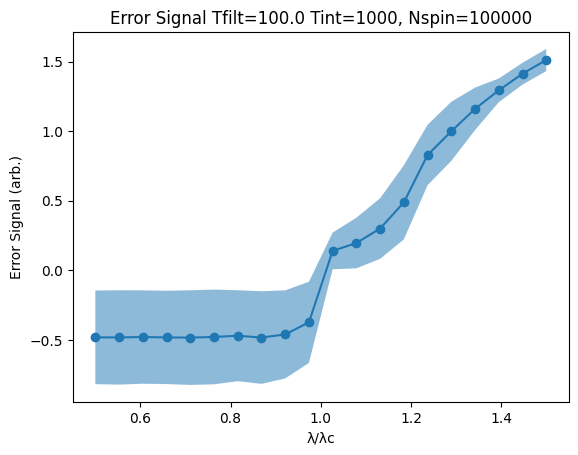

In [4]:
using PyPlot
ErrorSigs = rad #+ 1.0*Ifiltmeans
ErrorSigs_mean = mean(ErrorSigs, dims=2)
ErrorSigs_var = var(ErrorSigs, dims=2)
plot(λ0s, ErrorSig_mean, "o-")
fill_between(λ0s, ErrorSig_mean .- sqrt.(ErrorSig_var), ErrorSig_mean .+ sqrt.(ErrorSig_var), alpha=0.5)
xlabel("λ/λc")
ylabel("Error Signal (arb.)")
title("Error Signal Tfilt=$(Tfilt) Tint=1000, Nspin=$(Nspin)")
PyPlot.display_figs()

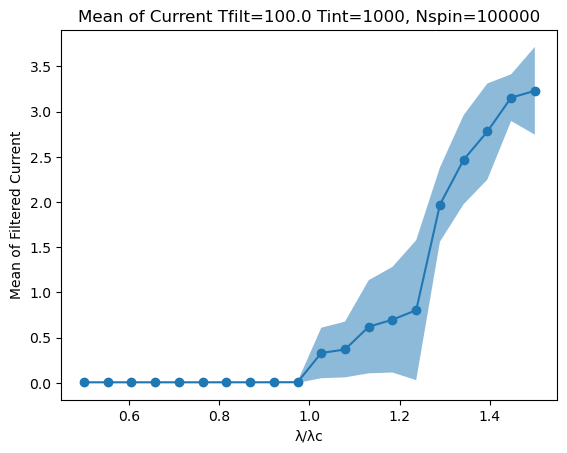

In [61]:
using PyPlot
plot(λ0s, Ifiltmean_mean, "o-")
fill_between(λ0s, Ifiltmean_mean .- sqrt.(Ifiltmean_var), Ifiltmean_mean .+ sqrt.(Ifiltmean_var), alpha=0.5)
xlabel("λ/λc")
ylabel("Mean of Filtered Current")
title("Mean of Current Tfilt=$(Tfilt) Tint=1000, Nspin=$(Nspin)")
PyPlot.display_figs()

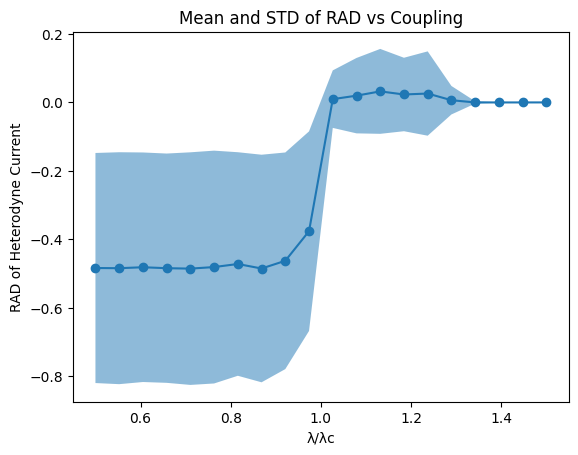

In [6]:
using PyPlot
plot(λ0s, rad_mean, "o-")
fill_between(λ0s, rad_mean .- sqrt.(rad_var), rad_mean .+ sqrt.(rad_var), alpha=0.5)
xlabel("λ/λc")
ylabel("RAD of Heterodyne Current")
title("Mean and STD of RAD vs Coupling") #"Tfilt=$(Tfilt) Tint=1000, Nspin=$(Nspin)")
PyPlot.display_figs()

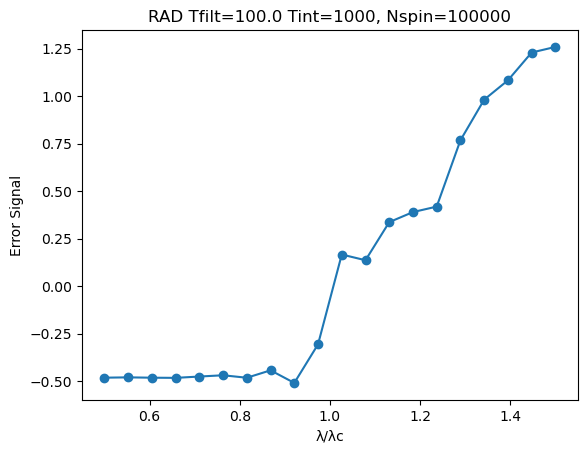

In [72]:
using PyPlot

plot(λ0s, rad_mean + 0.39*Ifiltmean_mean, "o-")
xlabel("λ/λc")
ylabel("Error Signal")
title("RAD Tfilt=$(Tfilt) Tint=1000, Nspin=$(Nspin)")
PyPlot.display_figs()

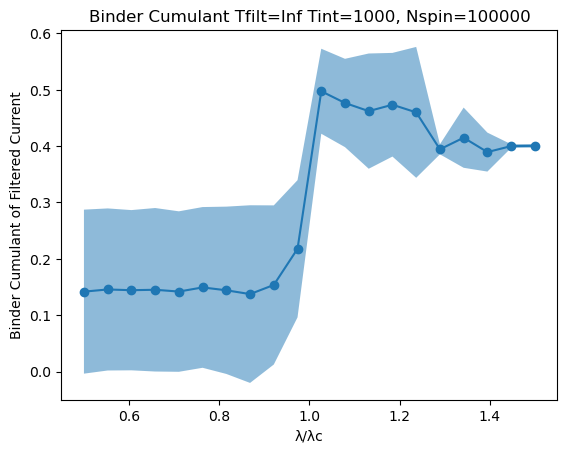

In [50]:
using PyPlot
plot(λ0s, binder_mean, "o-")
fill_between(λ0s, binder_mean .- sqrt.(binder_var), binder_mean .+ sqrt.(binder_var), alpha=0.5)
xlabel("λ/λc")
ylabel("Binder Cumulant of Filtered Current")
title("Binder Cumulant Tfilt=$(Tfilt) Tint=1000, Nspin=$(Nspin)")
PyPlot.display_figs()

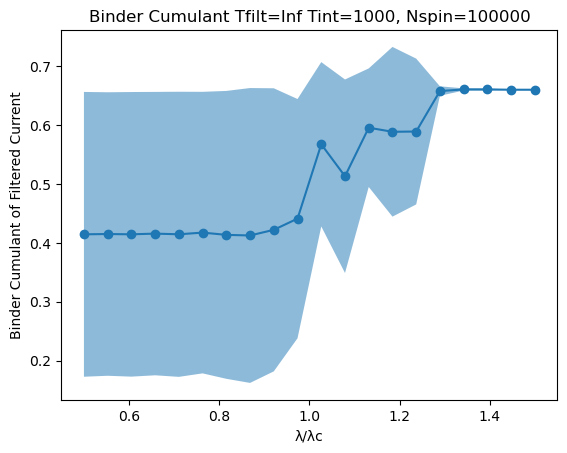

In [51]:
using PyPlot
plot(λ0s, binder_no_sub_mean, "o-")
fill_between(λ0s, binder_no_sub_mean .- sqrt.(binder_no_sub_var), binder_no_sub_mean .+ sqrt.(binder_no_sub_var), alpha=0.5)
xlabel("λ/λc")
ylabel("Binder Cumulant of Filtered Current")
title("Binder Cumulant Tfilt=$(Tfilt) Tint=1000, Nspin=$(Nspin)")
PyPlot.display_figs()

In [24]:
include("../HenryLib.jl")
Nspin=100000
dt = (2.0)^(-9)

function dicke_hetrodyne_atom_only_meanfield_prob_feedback(; Nspin=10, κ=2π * 0.15, Δc=2π * 20, ωz=2π * 0.01, λ0=1.0, t_ramp=500.0, t_hold=0.0, λmod=0.0, ωmod=2π * 1e-6 * 500.0, P = 5e-1, I = 1e-3, D = 0.0, PID_window_time=1000.0, Tfilt=100.0, tmax=500.0, taufilt=100, recordtimes=500, noise=nothing, save_noise=false)
    tspan = range(0.0, tmax, recordtimes)
    gc = sqrt(ωz * (Δc^2 + κ^2) / abs(Nspin * Δc))
    grel!(t) = smoothstep!((t - t_hold) / t_ramp)

    αplus = Δc / (-Δc + ωz - im * κ) + Δc / (-Δc - ωz - im * κ)
    αminus = Δc / (-Δc + ωz - im * κ) - Δc / (-Δc - ωz - im * κ)

    spin_len = Nspin / 2.0

    #                Sx   Sy     Sz       Q    Jhetfilt(t) + Q(t)
    u0 = ComplexF64[0.0, 0.0, -spin_len, 0.0, 0.0]

    p0 = [λ0]

    function f!(du, u, p, t)
        g = grel!(t) * gc * p[1]
        du[1] = -(ωz + real(αminus) * (g)^2 / (4 * Δc)) * u[2] + (g)^2 * u[3] / (2 * Δc) * (imag(αminus) - κ / Δc * real(conj(αplus) * αminus)) * u[1] - (g)^2 * κ / (4 * Δc^2) * (imag(conj(αplus) * αminus) * u[2] + conj(αminus) * αminus * u[1])
        du[2] = (ωz + real(αminus) * (g)^2 / (4 * Δc)) * u[1] + (g)^2 * u[3] / (2 * Δc) * (2 * real(αplus) * u[1] - (imag(αminus) + (κ / Δc) * real(conj(αplus) * αminus)) * u[2]) - (g)^2 * κ / (4 * Δc^2) * (imag(conj(αplus) * αminus) * u[1] + conj(αplus) * αplus * u[2])
        du[3] = (g)^2 / (2 * Δc) * (imag(αminus) * (u[2]^2 - u[1]^2) + κ / Δc * real(conj(αplus) * αminus) * (u[2]^2 + u[1]^2) - 2 * real(αplus) * u[2] * u[1]) - (g)^2 * κ / (4 * Δc^2) * (conj(αplus) * αplus + conj(αminus) * αminus) * u[3]
        du[4] = g * sqrt(κ) / (2 * Δc) * (αplus * u[1] + im * αminus * u[2])
        du[5] = -u[5] / taufilt + u[4] / taufilt^2
    end

    num_noise = 2
    noise_prototype = zeros(ComplexF64, (5, num_noise))

    function g!(du, u, p, t)
        g = grel!(t) * gc * p[1]
        du[1, 1] = g * sqrt(κ) / (2 * Δc) * u[3] * real(αminus)
        du[2, 1] = -g * sqrt(κ) / (2 * Δc) * u[3] * imag(αplus)
        du[3, 1] = g * sqrt(κ) / (2 * Δc) * (u[2] * imag(αplus) - u[1] * real(αminus))
        du[1, 2] = -g * sqrt(κ) / (2 * Δc) * u[3] * imag(αminus)
        du[2, 2] = -g * sqrt(κ) / (2 * Δc) * u[3] * real(αplus)
        du[3, 2] = g * sqrt(κ) / (2 * Δc) * (u[2] * real(αplus) + u[1] * imag(αminus))

        du[4, 1] = 1.0 / sqrt(2)
        du[4, 2] = 1.0im / sqrt(2)
    end

    t_error = LinRange(t_ramp, tmax, Int(floor((tmax - t_ramp) / PID_window_time)))
    error_sig = zeros(length(t_error))

    function PIDFeedback(integrator)
        # println("t: $(integrator.t)")
        t = integrator.t
        u = integrator.u
        t_indx = findall(t_error .== t)[1]
        if t > t_ramp && t_indx > 1
            t_ramp_end = findall(t_error .>= t_ramp)[1]
            DeltaT = t_error[2] - t_error[1]
            function get_Ifilt(x)
                rslt = real(x[1][5] - x[1][4]/taufilt)
                if isnan(rslt)
                    println("Got NAN")
                    return 0
                else
                    return rslt
                end
            end
            function get_Q(x)
                return real(x[1][4])
            end
            # println(any(map(x->any(isnan.(x)),out.saveval)))
            # println(out.saveval[t_error[t_indx-1] .< out.t .&& out.t .<= t_error[t_indx]])
            Ifilt = map(get_Ifilt, out.saveval[t_error[t_indx-1] .< out.t .&& out.t .<= t_error[t_indx]])
            Q = map(get_Q, out.saveval[t_error[t_indx-1] .< out.t .&& out.t .<= t_error[t_indx]])
            # if 2*abs(mean(Ifilt))/Nspin < 0.9
            error_sig[t_indx] =  rescaled_autodensity!(Q) + 0.39*abs(mean(Ifilt))
            # else
            #     print("Mean value too large, switching error signals")
            #     error_sig[t_indx] = 0.01*sign(integrator.p[1])*2*abs(mean(Ifilt))/Nspin
            # end
            # println(Ifilt)
            # println(any(isnan.(Ifilt)))
            # println(findall(isnan, Ifilt))
            # println(mean(Ifilt))
            # println("RAD: ", rescaled_autodensity!(Ifilt))
            # println("abs mean: ", abs(mean(Ifilt))/Nspin)
            println("Error: $(error_sig[t_indx])")
            # println("P term: $(error_sig[t_indx]) I term: $(sum(error_sig[1:t_indx]) * DeltaT) D term: $((error_sig[t_indx] - error_sig[t_indx-1]) / DeltaT)")
            integrator.p[1] = max(0.5,integrator.p[1] - P * error_sig[t_indx] - I * sum(error_sig[1:t_indx]) * DeltaT/(t - t_error[1]) - D * (error_sig[t_indx] - error_sig[t_indx-1]) / DeltaT)
            println(integrator.p[1])
        end
    end
    PIDCallback = PresetTimeCallback(t_error, PIDFeedback)

    function fout(x, t, integrator)
        return (copy(x), copy(integrator.p))
    end
    out_type = typeof((u0, p0))
    out = DiffEqCallbacks.SavedValues(eltype(tspan), out_type)
    scb = DiffEqCallbacks.SavingCallback(fout, out, saveat=tspan,
        save_everystep=false,
        save_start=false,
        tdir=first(tspan) < last(tspan) ? one(eltype(tspan)) : -one(eltype(tspan)))
    full_cb = CallbackSet(PIDCallback, scb)

    if noise isa Nothing
        noise = StochasticDiffEq.RealWienerProcess!(0.0, zeros(num_noise), save_everystep=save_noise)
    end

    prob = SDEProblem(f!, g!, u0, (tspan[begin], tspan[end]), p0; noise_rate_prototype=noise_prototype, noise=noise)
    prob, full_cb, tspan, out, noise, error_sig, t_error
end

tmax = 100000.0

prob, full_cb, tspan, out, CurrW, error_sig, t_error = dicke_hetrodyne_atom_only_meanfield_prob_feedback(;Nspin=100000, κ=2π * 0.15, Δc=-2π * 80, ωz=2π * 0.01, λ0=0.9,P = 5e-2, I = 5e-4, D = 0.0, t_ramp=600.0, t_hold=0.0, λmod=0.0, ωmod=2π * 1e-6 * 500.0, tmax=tmax, recordtimes=20_000, save_noise=false);

sol1 = solve(prob, RKMilGeneral(;ii_approx=IICommutative());
                            adaptive=false,
                            dt=dt,
                            save_everystep=false,
                            save_start=false,
                            save_end=false,
                            saveat=tspan,
                            callback=full_cb, 
                            seed=1360)
vec_t = copy(out.saveval)
tout = copy(out.t);

Error: 0.11241635801473598
0.8943229739202558
Error: -1.6709473695193855
0.9782599751491013
Error: -0.5053886393376628
1.0038733937244582
Error: -0.007290653568050809
1.004496827690912
Error: 0.038262779768605634
1.0027869834549459
Error: 0.290953398523239
0.9883844797059604
Error: -0.0026928930645928988
0.9886437448605603
Error: -0.07535683448012222
0.9925253393254203
Error: -0.14053612916188923
0.9996610668936717
Error: -0.19776781507768543
1.0096573750374513
Error: 0.10374107001187832
1.0045637127517615
Error: 0.22665740759757025
0.9933070069268952
Error: 0.062121353139961435
0.9902688557301723
Error: 0.015232983705976344
0.9895697277942823
Error: 0.015452768748831853
0.988854927430664
Error: -0.37531129531914026
1.0076864438688091
Error: 0.14665196739872427
1.0004116043677735
Error: -0.011526072844334913
1.001042778221531
Error: 0.05138892245060372
0.9985239620646064
Error: -0.02901318076836413
1.000023444899869
Error: -0.23241636596611723
1.011696295775312
Error: 0.236114896733105

In [34]:
include("../HenryLib.jl")
Nspin=100000
dt = (2.0)^(-9)

tmax = 100_000.0

prob, full_cb, tspan, out, CurrW, error_sig, t_error = dicke_hetrodyne_atom_only_meanfield_prob_feedback_smooth(;Nspin=100000, κ=2π * 0.15, Δc=-2π * 80, ωz=2π * 0.01, λ0=0.9,P = 7e-2, I = 5e-6, D = 0.0, PID_filt_T=10.0, set_point=0.01, t_ramp=500.0, t_hold=0.0, λmod=0.0, ωmod=2π * 1e-6 * 500.0, tmax=tmax, recordtimes=20000, save_noise=false);

sol1 = solve(prob, RKMilGeneral(;ii_approx=IICommutative());
                            adaptive=false,
                            dt=dt,
                            save_everystep=false,
                            save_start=false,
                            save_end=false,
                            saveat=tspan,
                            callback=full_cb, 
                            seed=1360)
vec_t = copy(out.saveval)
tout = copy(out.t);

Alpha plus -1.9999930000240602 - 0.003749986992231793im Alpha minus 0.00024999736720265897 + 9.37493437533788e-7im
Error: -0.01046861486195858
0.9007859472841516
Error: -1.4552853514822945
1.0100968667680783
Error: -0.038953493831762144
1.0204623048203585
Error: -0.4054734359027287
1.0585425371274186
Error: 0.20085552288966602
1.0531600931084233
Error: 0.18640562479932574
1.0478428480951634
Error: 0.0984664580948532
1.0481814767624187
Error: 0.2496316613422206
1.0366712784317689
Error: -0.10628254568546049
1.0506146211897764
Error: 0.07898047554442202
1.0511886056598212
Error: 0.05566903694797239
1.053111785261397
Error: 0.1462375862905205
1.0479527868255296
Error: 0.5306371076736118
1.0131920263717475
Error: -0.03383563736700342
1.0181161257196871
Error: 0.11246549408391725
1.012228211342524
Error: -0.0017965609504535223
1.0143477611144287
Error: -0.10000656491432264
1.023849697552017
Error: 0.19353640613689352
1.0118211325256825
Error: 0.13314376712535975
1.003344143820514
Error: -0.

Alpha plus -1.9999930000240602 - 0.003749986992231793im Alpha minus 0.00024999736720265897 + 9.37493437533788e-7im
Error: 0.19953138513804144
0.8930011312611019
Error: -1.2450905048663026
0.9356616592853033
Error: -0.6017220768156168
0.9620757950110023
Error: -0.9631844060270913
1.004223435735479
Error: -0.3383147709974164
1.0293424527006083
Error: 0.3815922369883878
1.030927094753697
Error: 0.4271561678554961
1.0289763475184448
Error: 0.3318332475185154
1.0282007262541135
Error: 0.4163065004378068
1.0227775147086544
Error: 0.22342607500525147
1.0220064866168341
Error: 0.3920104777450415
1.0141878732522267
Error: 0.06117219992505879
1.0159838656766809
Error: 0.2532060973926693
1.0107334326724857
Error: 0.26371781938484273
1.0038288764254237
Error: 0.27263870322711714
0.9952726349400783
Error: 0.10507756587368502
0.9912097980955179
Error: -0.05563943558610762
0.9922509265927523
Error: 0.3151045457761116
0.98057009777643
Error: -0.03388835718954139
0.9795310913317488
Error: 0.34817039358

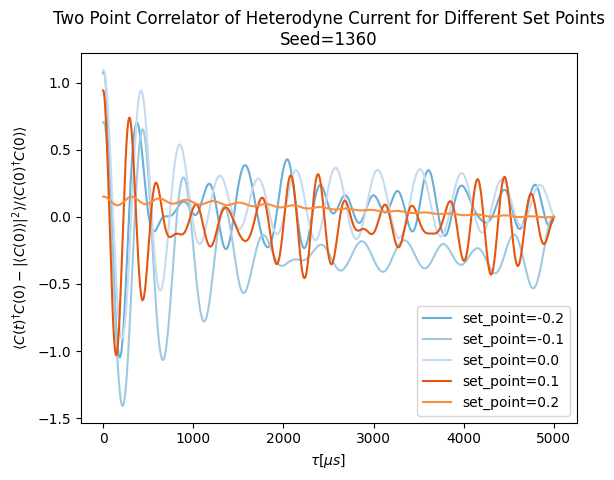

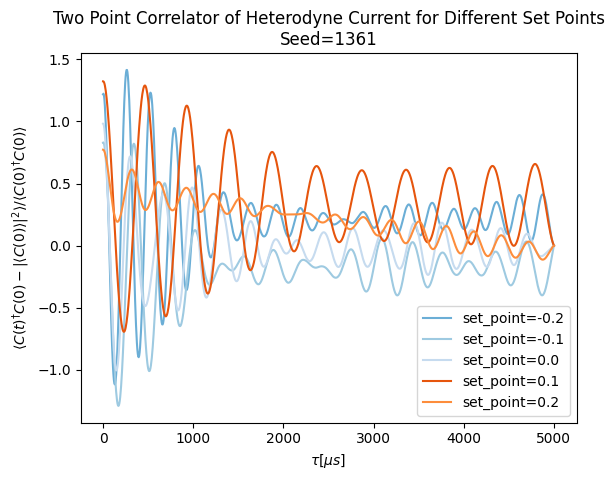

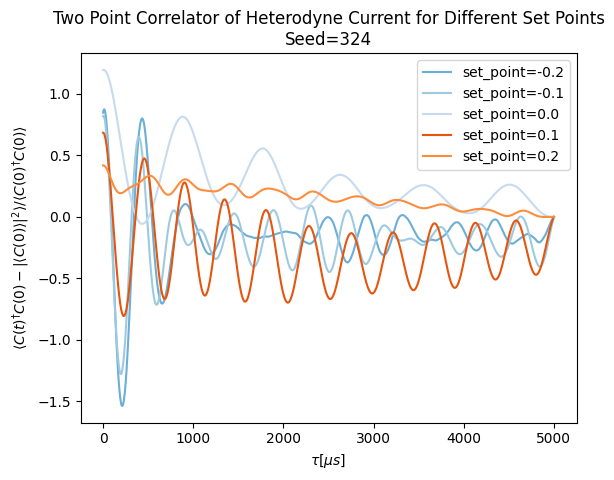

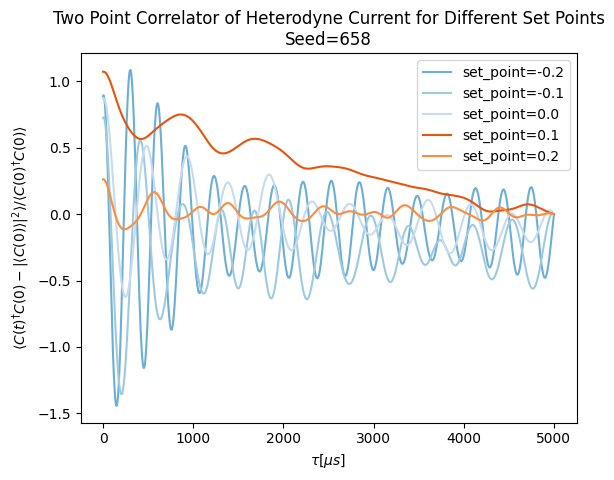

In [19]:
using PyPlot
include("../HenryLib.jl")
Nspin=100000
dt = (2.0)^(-9)

tmax = 100_000.0

set_points = LinRange(-0.2, 0.2, 5)
colors = get_cmap("tab20c")
seeds = [1360, 1361, 324, 658]  # List of seeds

for seed in seeds
    figure()
    for (i, set_point) in enumerate(set_points)
        prob, full_cb, tspan, out, CurrW, error_sig, t_error = dicke_hetrodyne_atom_only_meanfield_prob_feedback_smooth(;Nspin=100000, κ=2π * 0.15, Δc=-2π * 80, ωz=2π * 0.01, λ0=0.9,P = 3e-2, I = 5e-6, D = 0.0, PID_filt_T=10.0, set_point=set_point, t_ramp=500.0, t_hold=0.0, λmod=0.0, ωmod=2π * 1e-6 * 500.0, tmax=tmax, recordtimes=20_000, save_noise=false);

        sol1 = solve(prob, RKMilGeneral(;ii_approx=IICommutative());
                                    adaptive=false,
                                    dt=dt,
                                    save_everystep=false,
                                    save_start=false,
                                    save_end=false,
                                    saveat=tspan,
                                    callback=full_cb, 
                                    seed=seed)
        vec_t = copy(out.saveval)
        tout = copy(out.t);

        function get_Ifilt(x, taufilt)
            return real(x[1][5] - x[1][4]/taufilt)
        end

        tout_dt = tout[2]-tout[1]
        Tfilt=100.0
        time_bins = 1000
        delta_tau = collect(LinRange(0.0, time_bins*tout_dt, time_bins))
        g1 = two_point_correlator(map(x->get_Ifilt(x, Tfilt), vec_t)[Int(round(length(vec_t)/2)):end], tout, tout_dt, time_bins)
        Background = exp.(-delta_tau/Tfilt)*(1/(tout_dt)*(1 - exp(-tout_dt/Tfilt))^2/((1 - exp(-2*tout_dt/Tfilt))))
        Ifilt_mean_sq = (g1 - Background)[end]
        Ph_num = (g1 - Background)[begin]
        plot(delta_tau, (g1 - Background .- Ifilt_mean_sq)./Ph_num, color=colors(i), label="set_point=$(round(set_point, digits=3))")
    end

    ylabel(L"\langle C(t)^\dag C(0) - |\langle C(0) \rangle|^2\rangle/\langle C(0)^\dag C(0)\rangle")
    xlabel(L"\tau [\mu s]")
    title("Two Point Correlator of Heterodyne Current for Different Set Points\nSeed=$(seed)")
    legend()
    PyPlot.display_figs()
end

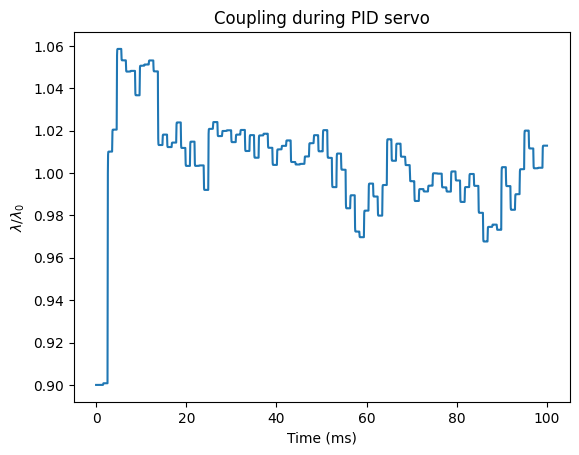

In [31]:
using PyPlot
plot(tout/1000, map(x->real(x[1][7]), vec_t))
title("Coupling during PID servo")
xlabel("Time (ms)")
ylabel(L"\lambda/\lambda_0")
PyPlot.display_figs()

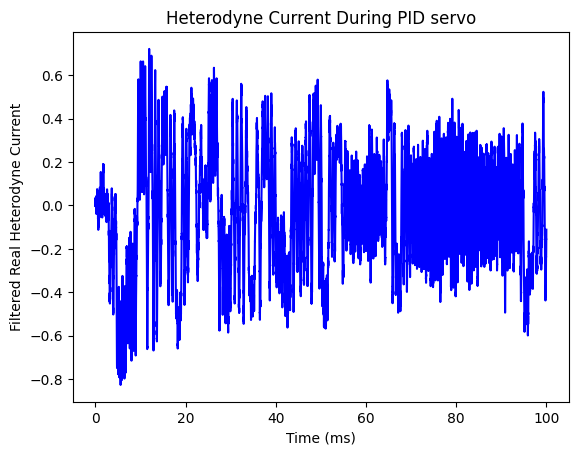

In [32]:
using PyPlot
function get_Ifilt(x, taufilt)
    return real(x[1][5] - x[1][4]/taufilt)
end

Q = map(x->real(x[1][4]), vec_t)
values = exp_filter(Q/100.0, 100.0, tout[2]-tout[1]) .- Q/100.0

# plot(tout/1000.0, values, color="red")
plot(tout/1000.0, -map(x->get_Ifilt(x, 100.0), vec_t), color="blue")
# plot(tout/1000.0, values .- map(x->get_Ifilt(x, 100.0), vec_t), color="blue")
xlabel("Time (ms)")
ylabel("Filtered Real Heterodyne Current")
title("Heterodyne Current During PID servo")
PyPlot.display_figs()

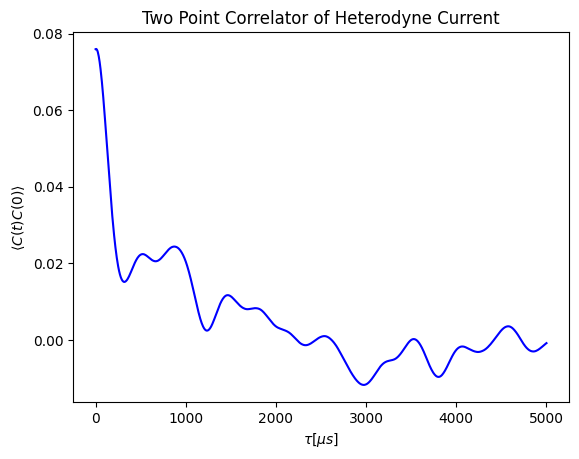

In [33]:
using Distributions
tout_dt = tout[2]-tout[1]
n = Normal(0.0, sqrt(tout_dt))
Qtest = cumsum(rand(n, length(tout))/sqrt(2) + im*rand(n, length(tout))/sqrt(2))
Ifilt = exp_filter(Qtest/Tfilt, Tfilt, tout_dt) .- Qtest/Tfilt
Tfilt=100.0
time_bins = 1000
delta_tau = collect(LinRange(0.0, time_bins*tout_dt, time_bins))
g1 = two_point_correlator(map(x->get_Ifilt(x, 100.0), vec_t), tout, tout_dt, time_bins)
Background = exp.(-delta_tau/Tfilt)*(1/(tout_dt)*(1 - exp(-tout_dt/Tfilt))^2/((1 - exp(-2*tout_dt/Tfilt))))
plot(delta_tau, g1 - Background, color="blue")
ylabel(L"\langle C(t) C(0)\rangle")
xlabel(L"\tau [\mu s]")
title("Two Point Correlator of Heterodyne Current")
PyPlot.display_figs()

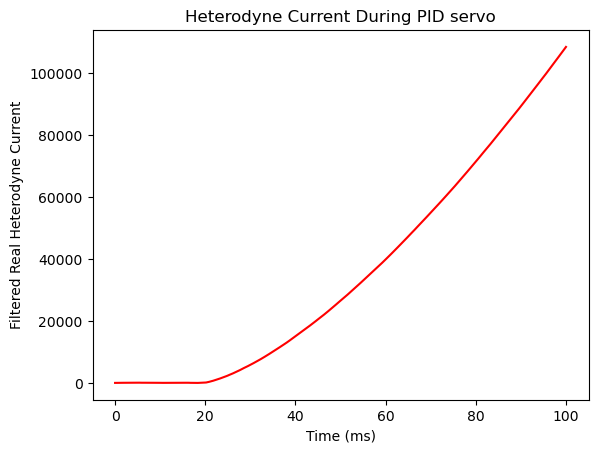

In [21]:
using PyPlot
function get_Ifilt(x, taufilt)
    return real(x[1][5] - x[1][4]/taufilt)
end

Q = map(x->real(x[1][4]), vec_t)
values = exp_filter(Q, 100.0, tout[2]-tout[1]) .- Q/100.0

plot(tout/1000.0, values, color="red")
# plot(tout/1000.0, map(x->get_Ifilt(x, 100.0), vec_t), color="blue")
xlabel("Time (ms)")
ylabel("Filtered Real Heterodyne Current")
title("Heterodyne Current During PID servo")
PyPlot.display_figs()

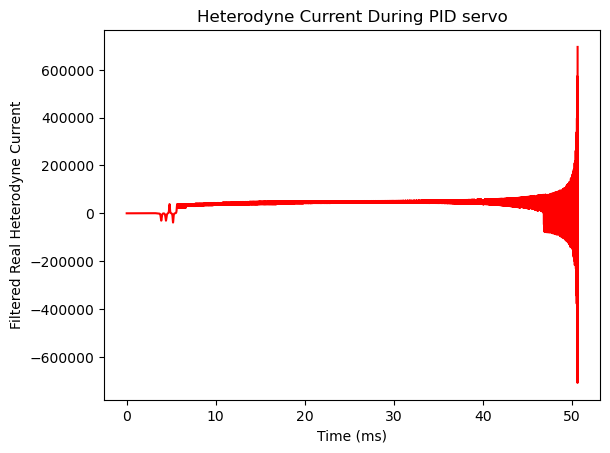

/Users/henryhunt/.julia/conda/3/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


In [14]:
plot(tout/1000.0, map(x->x[1][1], vec_t), color="red")
# plot(tout/1000.0, map(x->get_Ifilt(x, 100.0), vec_t), color="blue")
xlabel("Time (ms)")
ylabel("Filtered Real Heterodyne Current")
title("Heterodyne Current During PID servo")
PyPlot.display_figs()

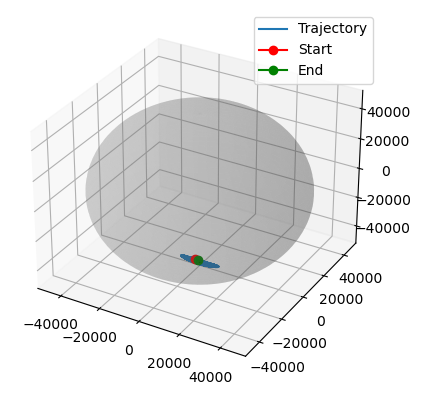

In [50]:
using PyPlot
include("PlotingLib.jl")
start = 40.
end_t = 70.0
blochplot3D(map(x->real(x[1][1]), vec_t)[end_t .> tout/1000.0 .> start], map(x->real(x[1][2]), vec_t)[end_t .> tout/1000.0 .> start], map(x->real(x[1][3]), vec_t)[end_t .> tout/1000.0 .> start], Nspin=Nspin)
legend()
PyPlot.display_figs()

In [19]:
include("../HenryLib.jl")
using PyPlot, Distributions, NPZ

Tfilt=100.0
Nspin=100_000
dt = (2.0)^(-12)
tmax=100_000.0

seed = 233
λ0 = 1.2

prob, full_cb, tspan, out, CurrW = dicke_hetrodyne_atom_only_meanfield_prob(;Nspin=Nspin, κ=2π * 60.0, Δc=-2π * 80, ωz=2π * 0.01, λ0=λ0, t_ramp=600.0, t_hold=100.0, λmod=0.0, ωmod=2π * 1e-6 * 500.0, tmax=tmax, recordtimes=50000, save_noise=false) # ,Sxinit=Nspin/2*sin(pi/12),Szinit=-Nspin/2*cos(pi/12)
sol1 = solve(prob, RKMilGeneral(;ii_approx=IICommutative());
                    adaptive=false,
                    dt=dt,
                    save_everystep=false,
                    save_start=false,
                    save_end=false,
                    saveat=tspan,
                    callback=full_cb, 
                    seed=seed)
vec_t = copy(out.saveval)
tout = copy(out.t);

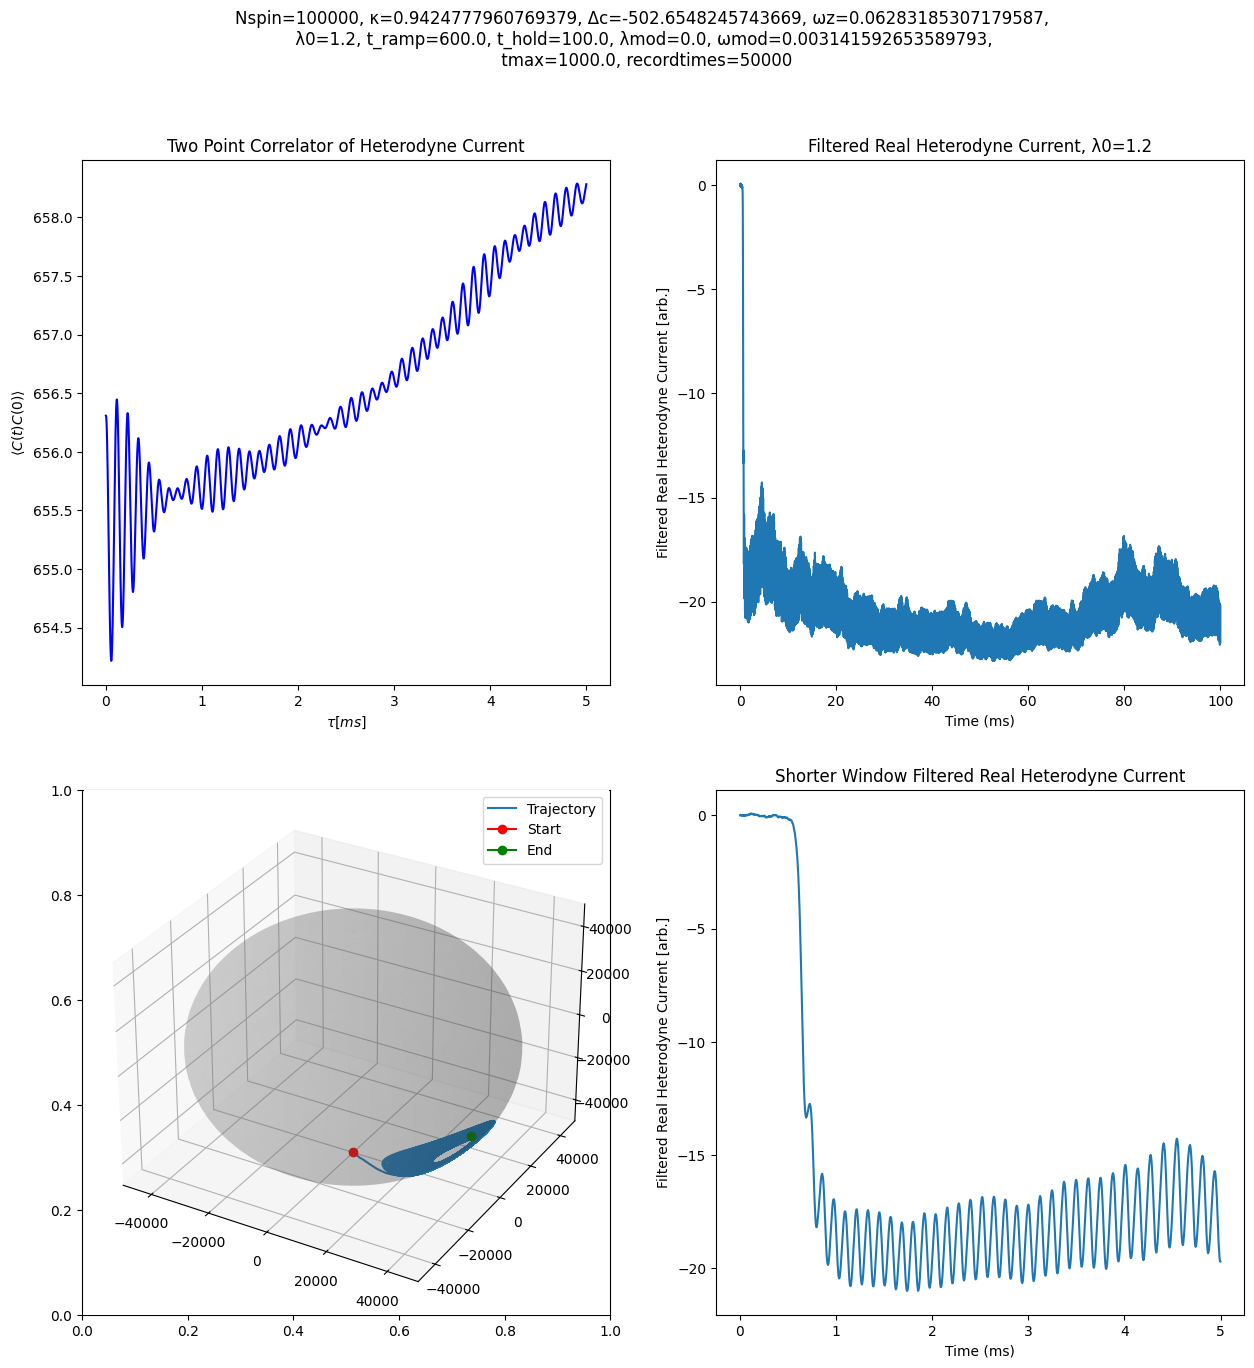

In [20]:
using PyPlot, Distributions
tmax = 1000.0
Q = map(x->x[4], vec_t)
Tfilt=100.0
tout_dt = tout[2]-tout[1]
n = Normal(0.0, sqrt(tout_dt))
Qtest = cumsum(rand(n, length(tout))/sqrt(2) + im*rand(n, length(tout))/sqrt(2))

fig, axs = PyPlot.subplots(ncols=2, nrows=2, figsize=(15, 15))

Ifilt = exp_filter(Q/Tfilt, Tfilt, tout_dt) .- Q/Tfilt

fig.suptitle("Nspin=$(Nspin), κ=$(2π * 0.15), Δc=$(2π * -80), ωz=$(2π * 0.01), \n λ0=$(λ0), t_ramp=600.0, t_hold=100.0, λmod=0.0, ωmod=$(2π * 1e-6 * 500.0), \n tmax=$(tmax), recordtimes=50000")

time_bins = 2500
delta_tau = collect(LinRange(0.0, time_bins*tout_dt, time_bins))
g1 = two_point_correlator(Ifilt, tout, tout_dt, time_bins)
Background = exp.(-delta_tau/Tfilt)*(1/(tout_dt)*(1 - exp(-tout_dt/Tfilt))^2/((1 - exp(-2*tout_dt/Tfilt))))

axs[1,1].plot(delta_tau/1000.0, g1 - Background, color="blue")
axs[1,1].set_ylabel(L"\langle C(t) C(0)\rangle")
axs[1,1].set_xlabel(L"\tau [ms]")
axs[1,1].set_title("Two Point Correlator of Heterodyne Current")

axs[1,2].set_title("Filtered Real Heterodyne Current, λ0=$(λ0)")
axs[1,2].set_xlabel("Time (ms)")
axs[1,2].set_ylabel("Filtered Real Heterodyne Current [arb.]")
axs[1,2].plot(tout/1000.0, real.(Ifilt))

axs[2,2].set_title("Shorter Window Filtered Real Heterodyne Current")
axs[2,2].set_xlabel("Time (ms)")
axs[2,2].set_ylabel("Filtered Real Heterodyne Current [arb.]")
start_t = 0.0
stop_t = 5000.0
axs[2,2].plot(tout[start_t .< tout .< stop_t]/1000.0, real.(Ifilt[start_t .< tout .< stop_t]))


ax3D = fig.add_subplot(2, 2, 3, projection="3d")
include("PlotingLib.jl")
fb, sb, bases, a, Sx, Sy, Sz, idOp = make_operators(4, Nspin)
blochplot3D(map(x->real(x[1]), vec_t), map(x->real(x[2]), vec_t), map(x->real(x[3]), vec_t), Nspin=Nspin, ax=ax3D)
ax3D.legend()

PyPlot.display_figs()

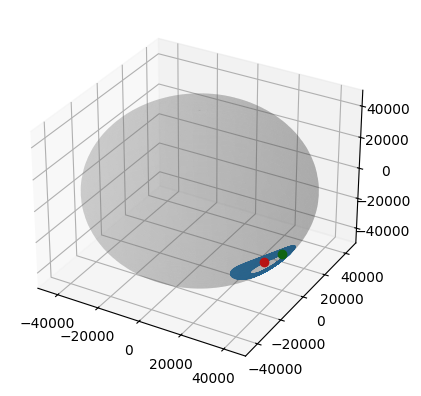

In [21]:
blochplot3D(map(x->real(x[1]), vec_t)[70_000.0.<tout], map(x->real(x[2]), vec_t)[70_000.0.<tout], map(x->real(x[3]), vec_t)[70_000.0.<tout], Nspin=Nspin)

PyPlot.display_figs()

In [4]:
include("../HenryLib.jl")

function dicke_hetrodyne_prob(; κ=2π * 0.15, Δc=2π * 20, ωz=2π * 0.01, λ0=1.0, fockmax=4, Nspin=20, tmax=5000.0, recordtimes=5000, seed=nothing, t_ramp=500.0, noise=nothing, save_noise=false)# ALL IN MHz
    fb, sb, bases, a, Sx, Sy, Sz, idOp = make_operators(fockmax, Nspin)

    tspan = range(0.0, tmax, recordtimes)

    ψ0 = tensor(spindown(sb), coherentstate(fb, 0.0))# + coherentstate(b,-0.7))
    ψ0 = normalize!(ψ0)
    print("Running with seed: ", seed)

    Q0 = 0 # charge on the photodiode at time 0
    cl0 = ComplexF64[Q0]
    ψ_sc0 = semiclassical.State(ψ0, cl0)
    tspan = range(0.0, tmax, recordtimes)
    stateG = copy(ψ_sc0)
    dstateG = copy(ψ_sc0)
    Nq = length(ψ_sc0.quantum)
    Nc = length(ψ_sc0.classical)
    Ntot = Nq + Nc
    u0 = zeros(ComplexF64, Ntot)
    semiclassical.recast!(u0, ψ_sc0)
    function norm_func(u, t, integrator)
        semiclassical.recast!(stateG, u)
        normalize!(stateG)
        semiclassical.recast!(u, stateG)
    end
    ncb = DiffEqCallbacks.FunctionCallingCallback(norm_func;
        func_everystep=true,
        func_start=false)
    gc = sqrt(ωz * (Δc^2 + κ^2) / abs(Nspin * Δc))
    grel!(t) = λ0 * smoothstep!(t / t_ramp)

    H0T1 = ωz * Sz + Δc * dagger(a)*a
    H0T2 = gc * Sx * (dagger(a) + a)
    function H0!(t)
        return H0T1 + H0T2 * grel!(t)
    end
    function H_nl!(t, ψ)
        Ct = sqrt(2*κ)*a
        return im * expect(dagger(Ct), normalize(ψ)) * Ct - 0.5im * dagger(Ct) * Ct - 0.5im * expect(dagger(Ct), normalize(ψ)) * expect(Ct, normalize(ψ)) * idOp
    end
    fdet_heterodyne!(t, ψ) = H0!(t) + H_nl!(t, ψ)
    function fst_heterodyne!(t, ψ)
        Ct = sqrt(2*κ)*a
        return [(Ct - expect(Ct, normalize(ψ)) * idOp) / sqrt(2), im * (Ct - expect(Ct, normalize(ψ)) * idOp) / sqrt(2)]
    end

    function f!(du, u, p, t)
        semiclassical.recast!(dstateG, du)
        semiclassical.recast!(stateG, u)
        timeevolution.dschroedinger_dynamic!(dstateG.quantum, fdet_heterodyne!, stateG.quantum, t)
        dstateG.classical[1] = expect(sqrt(2*κ)*a, normalize!(stateG.quantum))
        semiclassical.recast!(du, dstateG)
    end

    num_noise = length(fst_heterodyne!(0.0, ψ_sc0.quantum))
    noise_prototype = zeros(ComplexF64, (Ntot, num_noise))

    function g!(du, u, p, t)
        semiclassical.recast!(stateG, u)
        dx = @view du[1:Nq, :]
        stochastic.dschroedinger_stochastic(dx, t, stateG.quantum, fst_heterodyne!, dstateG.quantum, num_noise)
        du[Nq+1, 1] = 1.0 / sqrt(2)
        du[Nq+1, 2] = 1.0im / sqrt(2)
        du
    end

    Base.@pure pure_inference(fout, T) = Core.Compiler.return_type(fout, T)
    function fout(t, state)
        copy(state)
    end
    function fout_(x, t, integrator)
        semiclassical.recast!(stateG, x)
        copy(stateG)
    end
    out_type = pure_inference(fout, Tuple{eltype(tspan),typeof(ψ_sc0)})
    out = DiffEqCallbacks.SavedValues(eltype(tspan), out_type)
    scb = DiffEqCallbacks.SavingCallback(fout_, out, saveat=tspan,
        save_everystep=false,
        save_start=false,
        tdir=first(tspan) < last(tspan) ? one(eltype(tspan)) : -one(eltype(tspan)))
    full_cb = OrdinaryDiffEq.CallbackSet(nothing, ncb, scb)

    if noise isa Nothing
        noise = StochasticDiffEq.RealWienerProcess!(0.0, zeros(num_noise), save_everystep=save_noise)
    end

    prob = SDEProblem(f!, g!, u0, (tspan[begin], tspan[end]); noise_rate_prototype=noise_prototype, noise=noise)
    
    return prob, full_cb, tspan, out, noise
end

seed = 23
Nspin=10
prob, full_cb, tspan, out, noise = dicke_hetrodyne_prob(;seed=seed, λ0=0.8, tmax=100.0, recordtimes=100, Nspin=Nspin)
sol1 = solve(prob, RKMilGeneral(;ii_approx=IICommutative());
                    adaptive=false,
                    dt=2.0^(-12),
                    save_everystep=false,
                    save_start=false,
                    save_end=false,
                    saveat=tspan,
                    callback=full_cb, 
                    seed=seed)
psi_t = copy(out.saveval)
tout = copy(out.t);

Running with seed: 23

In [8]:
using PyPlot, Distributions
λ0 = 0.9
tmax = 1000.0
Q = map(x->x.classical[1], psi_t)
Tfilt=100.0
tout_dt = tout[2]-tout[1]
n = Normal(0.0, sqrt(tout_dt))
Qtest = cumsum(rand(n, length(tout))/sqrt(2) + im*rand(n, length(tout))/sqrt(2))

fig, axs = PyPlot.subplots(ncols=2, nrows=2, figsize=(15, 15))

Ifilt = exp_filter(Q/Tfilt, Tfilt, tout_dt) .- Q/Tfilt

fig.suptitle("Nspin=$(Nspin), κ=$(2π * 0.15), Δc=$(2π * -80), ωz=$(2π * 0.01), \n λ0=$(λ0), t_ramp=600.0, t_hold=100.0, λmod=0.0, ωmod=$(2π * 1e-6 * 500.0), \n tmax=$(tmax), recordtimes=50000")

time_bins = 2500
delta_tau = collect(LinRange(0.0, time_bins*tout_dt, time_bins))
g1 = two_point_correlator(Ifilt, tout, tout_dt, time_bins)
Background = exp.(-delta_tau/Tfilt)*(1/(tout_dt)*(1 - exp(-tout_dt/Tfilt))^2/((1 - exp(-2*tout_dt/Tfilt))))

axs[1,1].plot(delta_tau/1000.0, g1 - Background, color="blue")
axs[1,1].set_ylabel(L"\langle C(t) C(0)\rangle")
axs[1,1].set_xlabel(L"\tau [ms]")
axs[1,1].set_title("Two Point Correlator of Heterodyne Current")

axs[1,2].set_title("Filtered Real Heterodyne Current, λ0=$(λ0)")
axs[1,2].set_xlabel("Time (ms)")
axs[1,2].set_ylabel("Filtered Real Heterodyne Current [arb.]")
axs[1,2].plot(tout/1000.0, real.(Ifilt))

axs[2,2].set_title("Shorter Window Filtered Real Heterodyne Current")
axs[2,2].set_xlabel("Time (ms)")
axs[2,2].set_ylabel("Filtered Real Heterodyne Current [arb.]")
start_t = 0.0
stop_t = 5000.0
axs[2,2].plot(tout[start_t .< tout .< stop_t]/1000.0, real.(Ifilt[start_t .< tout .< stop_t]))


ax3D = fig.add_subplot(2, 2, 3, projection="3d")
include("PlotingLib.jl")
fb, sb, bases, a, Sx, Sy, Sz, idOp = make_operators(4, Nspin)
blochplot3D(expect(Sx, psi_t), expect(Sy, psi_t), expect(Sz, psi_t), Nspin=Nspin, ax=ax3D)
ax3D.legend()

PyPlot.display_figs()
# seedIndx = 1; λ0Indx = 1
# PyPlot.savefig("quick_plots/plots_$(seedIndx)_$(λ0Indx).png")
# PyPlot.savefig("quick_plots/plots_$(seedIndx)_$(λ0Indx).svg")
# NPZ.npy_save("quick_plots/vec_t_$(seedIndx)_$(λ0Indx).npy", vec_t)

PyCall.PyError: PyError ($(Expr(:escape, :(ccall(#= C:\Users\henhen724\.julia\packages\PyCall\1gn3u\src\pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'ValueError'>
ValueError('x and y must have same first dimension, but have shapes (50000,) and (100,)')
  File "C:\Users\henhen724\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py", line 1779, in plot
    lines = [*self._get_lines(self, *args, data=data, **kwargs)]
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\henhen724\anaconda3\Lib\site-packages\matplotlib\axes\_base.py", line 296, in __call__
    yield from self._plot_args(
               ^^^^^^^^^^^^^^^^
  File "C:\Users\henhen724\anaconda3\Lib\site-packages\matplotlib\axes\_base.py", line 486, in _plot_args
    raise ValueError(f"x and y must have same first dimension, but "


In [15]:
psi_t[end].quantum

Ket(dim=105)
  basis: [Spin(10) ⊗ Fock(cutoff=4)]
    -1.7012305029e-7 - 2.8481056244e-7im
    -5.3272242504e-7 - 7.4216327769e-7im
   -1.19973445015e-6 - 1.4036027554e-6im
   -2.17757460955e-6 - 2.19839746397e-6im
   -3.34947325104e-6 - 2.99306835425e-6im
    -4.4921091153e-6 - 3.62805765017e-6im
   -5.34998726182e-6 - 3.97326718262e-6im
   -5.72143959191e-6 - 3.9700617484e-6im
   -5.53048377974e-6 - 3.63606660794e-6im
   -4.85782792166e-6 - 3.060115631e-6im
                     ⋮
 0.08232884558132395 - 0.03984230328101619im
 0.04669459045438593 - 0.02186664418978203im
 0.02396893576201546 - 0.01089520364432621im
 0.01106560597861958 - 0.00486554617871304im
 0.00452641025892903 - 0.00193595233194677im
  0.0016169789838136 - 0.00066854989207056im
 0.00048634206372512 - 0.0001960528957167im
 0.00011718225852141 - 4.562315839993e-5im
   1.941718462333e-5 - 7.38912369025e-6im

In [14]:
using PyPlot
Q = map(x->x[4], vec_t)
tout_dt = tout[2]-tout[1]
# n = Normal(0.0, sqrt(tout_dt))
# Qtest = cumsum(rand(n, length(tout))/sqrt(2) + im*rand(n, length(tout))/sqrt(2))

fig, axs = PyPlot.subplots(ncols=2, nrows=2, figsize=(15, 15))

Ifilt = exp_filter(Q/Tfilt, Tfilt, tout_dt) .- Q/Tfilt

fig.suptitle("Nspin=$(Nspin), κ=$(2π * 0.15), Δc=$(2π * -80), ωz=$(2π * 0.01), \n λ0=$(λ0), t_ramp=600.0, t_hold=100.0, λmod=0.0, ωmod=$(2π * 1e-6 * 500.0), \n tmax=$(tmax), recordtimes=50000")

time_bins = 2500
delta_tau = collect(LinRange(0.0, time_bins*tout_dt, time_bins))
g1 = two_point_correlator(Ifilt, tout, tout_dt, time_bins)
Background = exp.(-delta_tau/Tfilt)*(1/(tout_dt)*(1 - exp(-tout_dt/Tfilt))^2/((1 - exp(-2*tout_dt/Tfilt))))

axs[1,1].plot(delta_tau/1000.0, g1 - Background, color="blue")
axs[1,1].set_ylabel(L"\langle C(t) C(0)\rangle")
axs[1,1].set_xlabel(L"\tau [ms]")
axs[1,1].set_title("Two Point Correlator of Heterodyne Current")

axs[1,2].set_title("Filtered Real Heterodyne Current, λ0=$(λ0)")
axs[1,2].set_xlabel("Time (ms)")
axs[1,2].set_ylabel("Filtered Real Heterodyne Current [arb.]")
axs[1,2].plot(tout/1000.0, real.(Ifilt))

axs[2,2].set_title("Shorter Window Filtered Real Heterodyne Current")
axs[2,2].set_xlabel("Time (ms)")
axs[2,2].set_ylabel("Filtered Real Heterodyne Current [arb.]")
start_t = 0.0
stop_t = 5000.0
axs[2,2].plot(tout[start_t .< tout .< stop_t]/1000.0, real.(Ifilt[start_t .< tout .< stop_t]))


ax3D = fig.add_subplot(2, 2, 3, projection="3d")
include("PlotingLib.jl")
blochplot3D(map(x->real(x[1]), vec_t), map(x->real(x[2]), vec_t), map(x->real(x[3]), vec_t), Nspin=Nspin, ax=ax3D)
ax3D.legend()

seedIndx = 1; λ0Indx = 1
PyPlot.savefig("quick_plots/plots_$(seedIndx)_$(λ0Indx).png")
PyPlot.savefig("quick_plots/plots_$(seedIndx)_$(λ0Indx).svg")
NPZ.npy_save("quick_plots/vec_t_$(seedIndx)_$(λ0Indx).npy", vec_t)

UndefVarError: UndefVarError: `Tfilt` not defined

$\kappa = 2 \pi \times $ 1 MHz

$\Delta_c = -2 \pi \times $ 80 MHz

$\omega_z(0) = 2 \pi \times $ 10 kHz

$M = $ 100,000

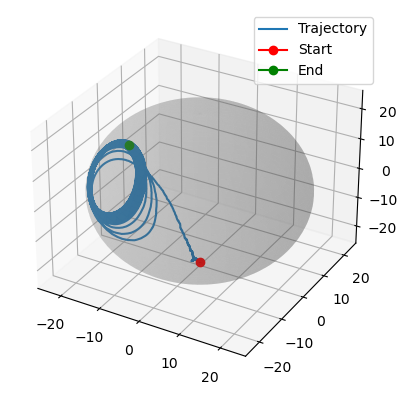

In [75]:
using PyPlot
include("PlotingLib.jl")
i = 1
blochplot3D(map(x->real(x[1]), vec_t), map(x->real(x[2]), vec_t), map(x->real(x[3]), vec_t), Nspin=Nspin)
legend()
PyPlot.display_figs()

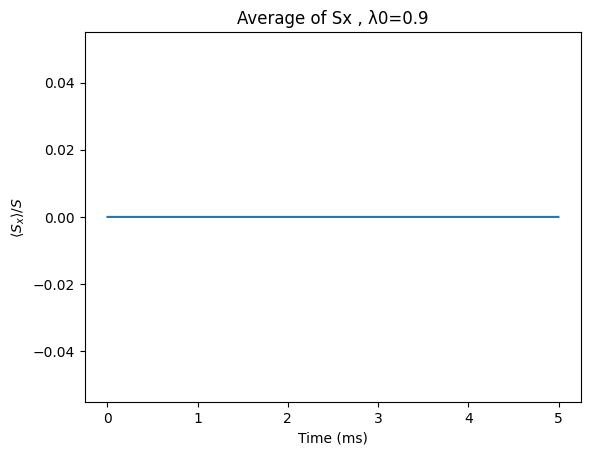

In [10]:
values = 2*map(x->x[1], vec_t)/Nspin
title("Average of Sx , λ0=$(round(λ0, digits=2))")
xlabel("Time (ms)")
ylabel(L"⟨S_x⟩/S")
start_t = 0.0
stop_t = 5000.0
plot(tout[start_t .< tout .< stop_t]/1000.0, real.(values[start_t .< tout .< stop_t]))
PyPlot.display_figs()

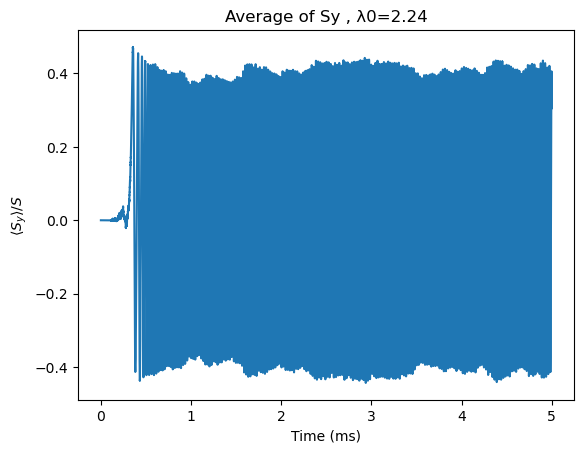

In [76]:
values = 2*map(x->x[2], vec_t)/Nspin
title("Average of Sy , λ0=$(round(λ0, digits=2))")
xlabel("Time (ms)")
ylabel(L"⟨S_y⟩/S")
start_t = 0.0
stop_t = 5000.0
plot(tout[start_t .< tout .< stop_t]/1000.0, real.(values[start_t .< tout .< stop_t]))
PyPlot.display_figs()

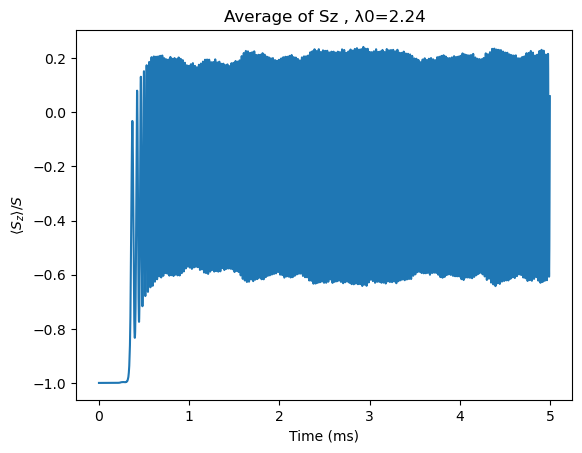

In [77]:
values = 2*map(x->x[3], vec_t)/Nspin
title("Average of Sz , λ0=$(round(λ0, digits=2))")
xlabel("Time (ms)")
ylabel(L"⟨S_z⟩/S")
start_t = 0.0
stop_t = 5000.0
plot(tout[start_t .< tout .< stop_t]/1000.0, real.(values[start_t .< tout .< stop_t]))
PyPlot.display_figs()

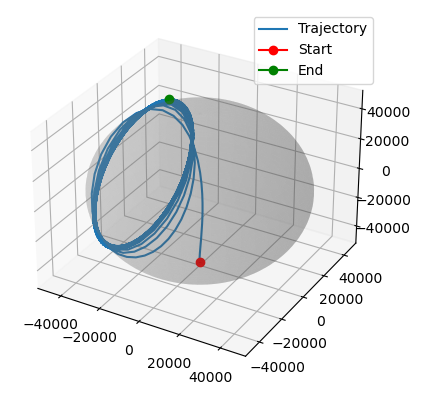

In [12]:
using PyPlot
include("PlotingLib.jl")
sub_vec = vec_t[start_t .< tout .< stop_t]
blochplot3D(map(x->real(x[1]), sub_vec), map(x->real(x[2]), sub_vec), map(x->real(x[3]), sub_vec), Nspin=Nspin)
legend()
PyPlot.display_figs()

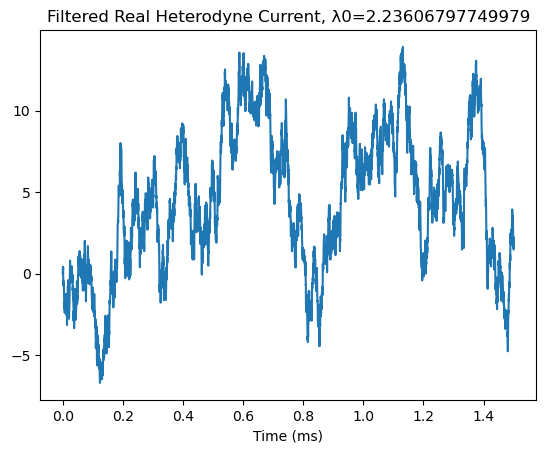

In [40]:
Q = map(x->real(x[4]), vec_t)
values = exp_filter(Q, 100.0, tout[2]-tout[1]) .- Q
title("Filtered Real Heterodyne Current, λ0=$(λ0)")
xlabel("Time (ms)")
plot(tout/1000.0, real.(values))
PyPlot.display_figs()

In [38]:
rescaled_autodensity!(values)

-0.6162700664615923

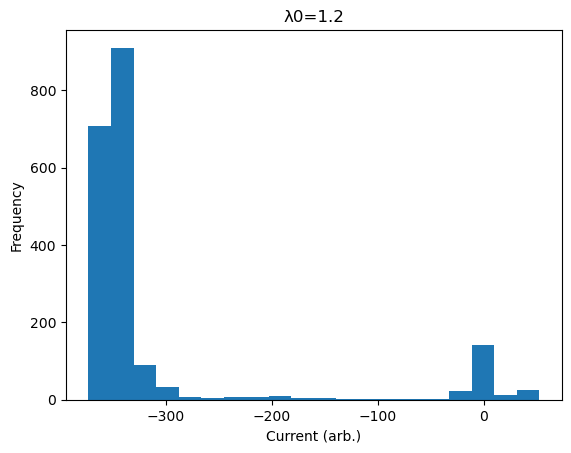

In [36]:
# values = map(x->real(x[4]), vec_t)
hist(values, bins=20)
title("λ0=$(λ0)")
xlabel("Current (arb.)")
ylabel("Frequency")
PyPlot.display_figs()

In [88]:
println("Third cumulant: ", mean((values .- mean(values)).^3), "\n Forth moment: ", kurtosis(values), "\n Binder cumulant: ", 1 - mean(values.^4)/(3*mean(values.^2)^2))

UndefVarError: UndefVarError: `kurtosis` not defined

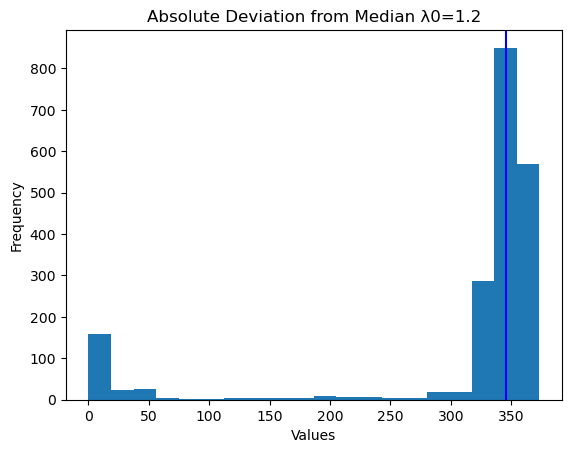

In [37]:
values2 = abs.(values)
hist(values2, bins=20)
xlabel("Values")
ylabel("Frequency")
title("Absolute Deviation from Median λ0=$(λ0)")
PyPlot.axvline(x = median(values2), color = "b", label = "Median")
PyPlot.display_figs()

In [234]:
function variance(x)
    return mean(x.^2) - mean(x)^2
end
function skewness(x)
    return mean(x.^3) - 3*mean(x)*variance(x) - mean(x)^3
end
function kurtosis(x)
    return mean(x.^4) - 4*mean(x)*mean(x.^3) + 6*mean(x)^2*variance(x) - mean(x)^4
end
1/sqrt(variance(Down)) - 1/sqrt(variance(Up))

0.011961681503291938

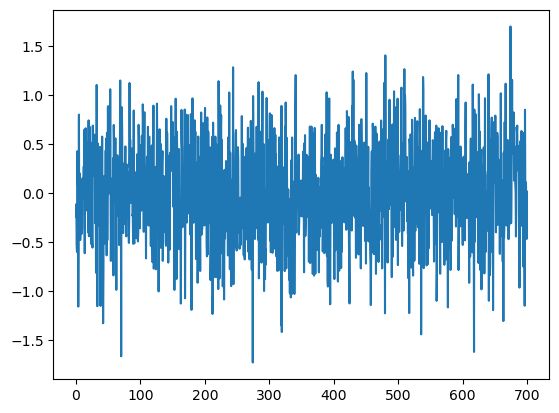

In [31]:
plot(tout[begin:end-1], map(x->real(x[4]), vec_t)[begin+1:end] - map(x->real(x[4]), vec_t)[begin:end-1])
PyPlot.display_figs()

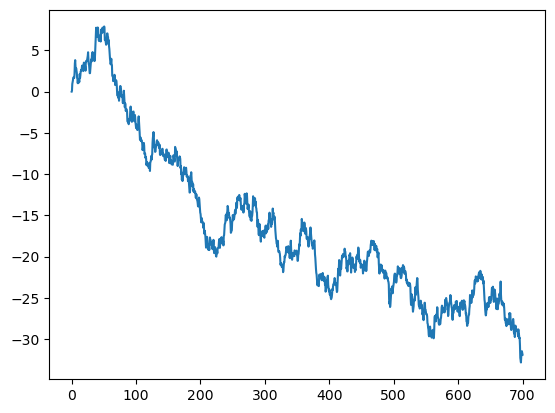

In [9]:
plot(tout, map(x->imag(x[4]), vec_t))
PyPlot.display_figs()

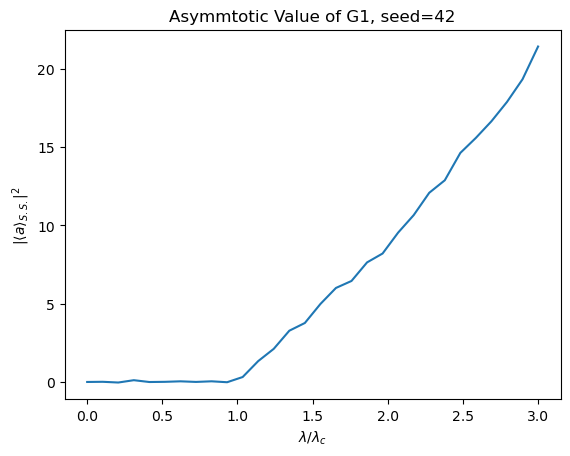

In [93]:
λrels = LinRange(0.0, 3.0, 30)
plot(λrels, asquared)
# legend()
xlabel(L"$\lambda / \lambda_c$")
# xlabel(L"$\tau$ [$\mu$s]")
ylabel(L"|\langle a \rangle_{S.S.}|^2")
# # PyPlot.colorbar()
PyPlot.title("Asymmtotic Value of G1, seed=$(seed)")
PyPlot.display_figs()

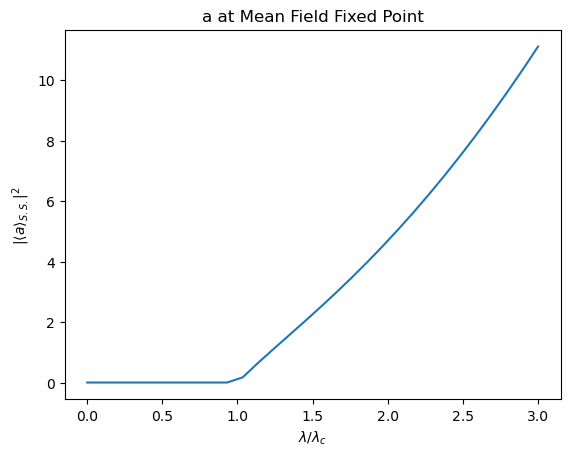

In [102]:
κ=2π * 0.15; Δc=2π * 20; ωz=2π * 0.01; fockmax=4; Nspin=10000; tmax=500.0;
λc = 1 / 2 * sqrt((Δc^2 + κ^2) / Δc * ωz)
function find_alpha(λ)
    if λ/λc > 1.0
        θ_α = atan(-κ/Δc)
        Szinit = -ωz*Nspin/(8*λ^2)*sqrt(Δc^2 + κ^2)/cos(θ_α)
        Sxinit = sqrt(Nspin^2/4 - Szinit^2)
        αinit = 2im*λ/(sqrt(Nspin)*(-1im*Δc-κ))*Sxinit
    
        return αinit^2
    end
    return 0.
end
λrels = LinRange(0.0, 3.0, 30)
plot(λrels, find_alpha.(λrels*λc))
# legend()
xlabel(L"$\lambda / \lambda_c$")
# xlabel(L"$\tau$ [$\mu$s]")
ylabel(L"|\langle a \rangle_{S.S.}|^2")
# # PyPlot.colorbar()
PyPlot.title("a at Mean Field Fixed Point")
PyPlot.display_figs()

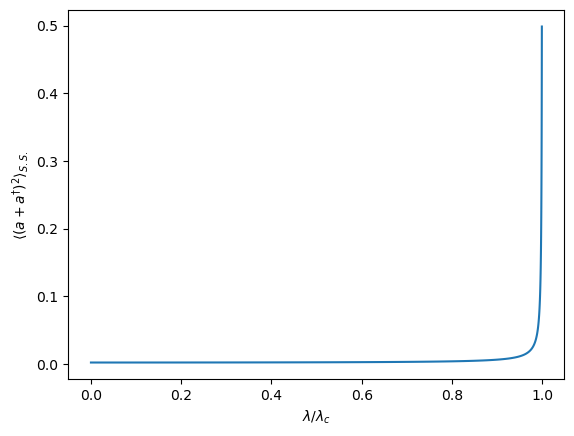

In [115]:
λrels = 1.0 .- 10 .^LinRange(0.0, -3.0, 100)
κ=2π * 0.15; Δc=2π * 20; ωz=2π * 0.01; fockmax=4; Nspin=10000; tmax=500.0;
λc = 1 / 2 * sqrt((Δc^2 + κ^2) / Δc * ωz)
λ = λc*λrels
alphasq = (κ^2 + Δc^2) .- (4*Δc*λ.^2)/ωz
xsq = ((Δc^2 + κ^2) .+ alphasq) ./ (8*Δc*alphasq)
plot(λrels,xsq)
xlabel(L"$\lambda / \lambda_c$")
# xlabel(L"$\tau$ [$\mu$s]")
ylabel(L"\langle (a + a^\dag)^2 \rangle_{S.S.}")
PyPlot.display_figs()

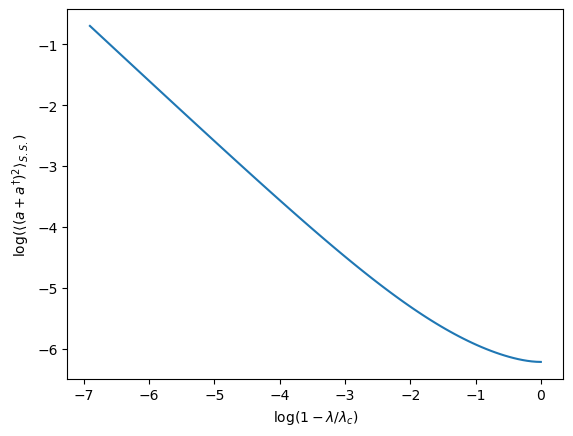

In [124]:
plot(log.(1.0 .- λrels),log.(xsq))
xlabel(L"$\log(1 - \lambda / \lambda_c)$")
# xlabel(L"$\tau$ [$\mu$s]")
ylabel(L"\log(\langle (a + a^\dag)^2 \rangle_{S.S.})")
PyPlot.display_figs()

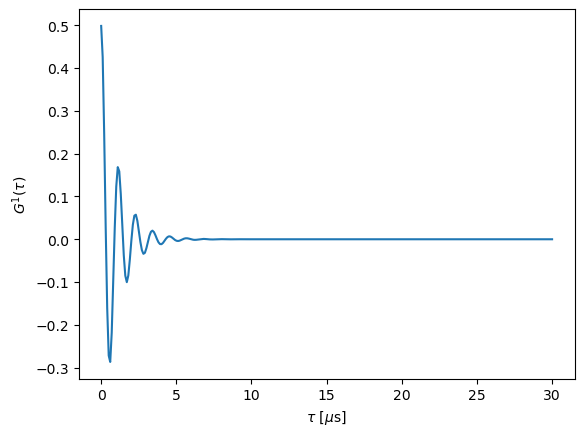

In [130]:
ts = LinRange(0.0, 30.0, 300)
κ=2π * 0.15; Δc=2π * 20; ωz=2π * 0.01; fockmax=4; Nspin=10000; tmax=500.0;

λrel = 0.999
λc = 1 / 2 * sqrt((Δc^2 + κ^2) / Δc * ωz)
λ = λrel*λc

function sachdev_sol!(time)
    alphasq = κ^2 + Δc^2 - (4
    *Δc*λ^2)/ωz
    msq = Δc^2 - (4*Δc*λ^2)/ωz
    return exp.(-κ*time)/(8*Δc*msq*alphasq).*(msq*(κ^2 + Δc^2 + alphasq)*cos.(sqrt(msq+0im)*time) + κ*sqrt(msq+0im)*(κ^2 + Δc^2 - alphasq)*sin.(sqrt(msq+0im)*time))
end
alphasq = κ^2 + Δc^2 - (4*Δc*λ^2)/ωz
# axhline(y=((Δc^2 + κ^2 + alphasq)/(8*Δc*alphasq)))
plot(ts,sachdev_sol!(ts))
xlabel(L"$\tau$ [$\mu$s]")
ylabel(L"$G^1 (\tau)$")
PyPlot.display_figs()

In [31]:
1/sqrt(λc)

0.8436483425812716

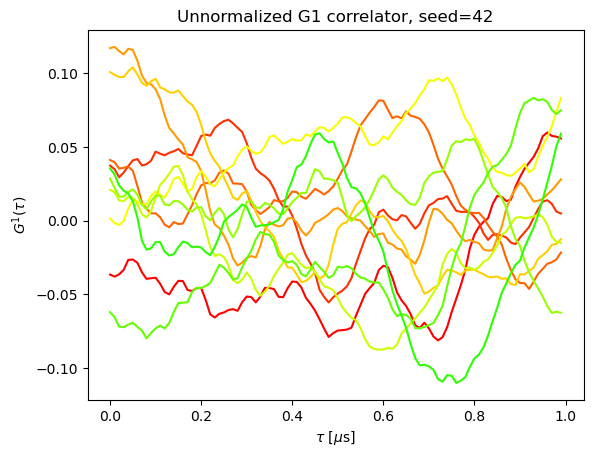

In [5]:
seed = 42
λrels = LinRange(0.0, 3.0, 30)
aIndx = 1
Sx = 2
Sy = 3
Sz = 4
# short_list = λrels[1:7]
cm = get_cmap(:hsv)
κ=2π*0.15
for λrel in λrels[1:10]
    rslt = load("MeanFieldRslts/seed=$(seed)lambda=$(round(λrel,digits=3)).jld2");
    tout = rslt["t"]
    a = map((x)->x[aIndx], rslt["u"])
    dt = tout[2] - tout[1]
    white_noise = (rslt["WArr"][2:end] - rslt["WArr"][1:end-1])/dt#convert_to_whitenoise(rslt["WArr"], tout, tout)

    Jhet = sqrt(2*κ)*a[1:end-1] + conj(white_noise);
    # println(mean(white_noise), " ", std(white_noise), " ", 1/sqrt(dt))
    tau = dt*10
    # print(tau)
    Jhetfilt = exp_filter(Jhet, tau, dt)
    time_bins = 100
    time = tout[1:time_bins]

    two_point = real.(two_point_correlator(Jhetfilt, time_bins))

    # @. model(x,p) = p[1]*exp(-x*p[2])
    # fit = curve_fit(model, time,two_point, [1/(dt)*(1 - exp(-dt/tau))^2/(1 - exp(-2*dt/tau)), 1/tau])

    Background = exp.(-time/tau)*(1/(dt)*(1 - exp(-dt/tau))^2/(1 - exp(-2*dt/tau)))

    # rslt = confidence_interval(fit, 0.1)
    # println("Pre-factor Actual: $(rslt[1][1])-$(rslt[1][2]) \t Expected: $(1/(dt)*(1 - exp(-dt/tau))^2/(1 - exp(-2*dt/tau)))\n Decay time: $(rslt[2][1])-$(rslt[2][2]) \t Expected: $(1/tau)")

    # println(fit.param[1]*dt*(1 - exp(-2*dt/tau))/(1 - exp(-dt/tau))^2)

    # PyPlot.plot(time, two_point, label="White noise correlations")#  - Background
    # PyPlot.plot(time, model(time, fit.param), label="Fit")
    # PyPlot.plot(time, two_point - model(time, fit.param), label="Fit")
    # PyPlot.plot(time, Background)
    PyPlot.plot(time, two_point_correlator(Jhetfilt, tout, dt, time_bins) - Background, color=cm(λrel/λrels[end]), label="$(round(λrel,digits=2))")
    # plot(time, two_point_correlator(Jhetfilt, tout, dt, time_bins) - two_point_correlator(exp_filter(conj(white_noise), tau, dt), tout, dt, time_bins))
end
# legend()
xlabel(L"$\tau$ [$\mu$s]")
ylabel(L"$G^1 (\tau)$")
# # PyPlot.colorbar()
PyPlot.title("Unnormalized G1 correlator, seed=$(seed)")
PyPlot.display_figs()

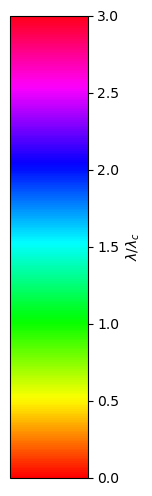

In [23]:
fig, ax = PyPlot.subplots(figsize=(1,6))
cm = get_cmap(:hsv)
norm = matplotlib[:colors][:Normalize](vmin=0.0, vmax=3.0)
cb1 = matplotlib[:colorbar][:ColorbarBase](ax, cmap=cm, norm=norm)
cb1.set_label("\$\\lambda/\\lambda_c\$")
PyPlot.display_figs()

In [6]:
seed = 42
λrel = 0.0
rslt = load("MeanFieldRslts/seed=$(seed)lambda=$(round(λrel,digits=3)).jld2");

In [7]:
rslt

Dict{String, Any} with 3 entries:
  "t"    => [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09  …  499.…
  "WArr" => ComplexF64[0.0+0.0im, 0.0169975+0.0571051im, -0.0320016+0.120822im,…
  "u"    => Vector{ComplexF64}[[0.0+0.0im, 0.0+0.0im, 0.0+0.0im, -5000.0+0.0im]…

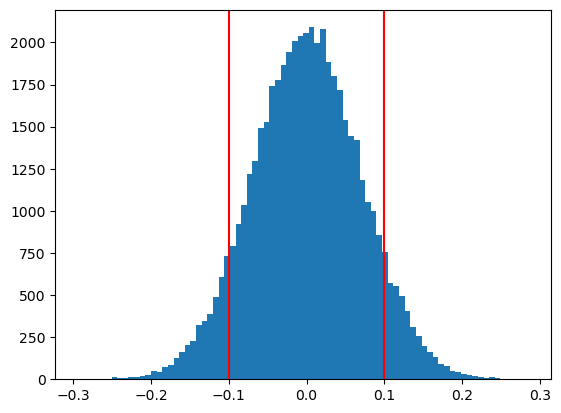

In [14]:
PyPlot.hist(rslt["WArr"][2:end] - rslt["WArr"][1:end-1], bins=80)
dt = rslt["t"][2] - rslt["t"][1]
PyPlot.axvline(x = sqrt(dt), color="r")
PyPlot.axvline(x = -sqrt(dt), color="r")
PyPlot.display_figs()

In [18]:
tau = dt*10
time_bins = 1000
time = dt*collect(1:time_bins)

two_point = real.(two_point_correlator(rslt["WArr"][2:end] - rslt["WArr"][1:end-1], rslt["t"], dt, time_bins))

1000-element Vector{Float64}:
  0.009978124408942536
 -4.763736517559478e-5
  1.8804765834569885e-5
 -4.746588930933668e-6
  4.9384449158605464e-5
 -2.3115461735049163e-5
  2.5609304873435527e-5
  1.0765223220575885e-5
 -1.672866827000148e-5
 -1.6233057997598767e-5
  ⋮
  7.542671073121363e-5
  4.018904535578875e-5
 -1.2242158220256291e-5
  3.082506166643636e-5
 -2.8060235562893758e-5
  7.504898871118844e-6
 -3.623196792525425e-5
 -3.587396235399625e-5
 -2.8427139225261407e-5

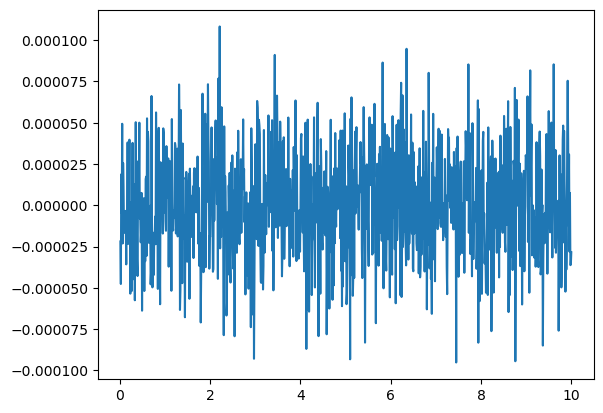

In [22]:
two_point[1] = two_point[1] - dt
PyPlot.plot(time, two_point)
PyPlot.display_figs()

LinRange{Float64}(0.0, 29.902990299029902, 300)[0.0, 0.1000100010001, 0.2000200020002, 0.3000300030003, 0.4000400040004, 0.5000500050005, 0.6000600060006, 0.7000700070007, 0.8000800080008, 0.9000900090009001, 1.000100010001, 1.1001100110011, 1.2001200120012, 1.3001300130013, 1.4001400140014, 1.5001500150015001, 1.6001600160016, 1.7001700170017, 1.8001800180018002, 1.9001900190019, 2.000200020002, 2.1002100210021, 2.2002200220022, 2.3002300230023, 2.4002400240024, 2.5002500250025, 2.6002600260026, 2.7002700270027002, 2.8002800280028, 2.9002900290029, 3.0003000300030003, 3.1003100310031, 3.2003200320032, 3.3003300330033003, 3.4003400340034, 3.5003500350035, 3.6003600360036003, 3.7003700370037, 3.8003800380038, 3.9003900390039004, 4.000400040004, 4.1004100410041, 4.2004200420042, 4.3004300430043, 4.4004400440044, 4.5004500450045, 4.6004600460046, 4.7004700470047, 4.8004800480048, 4.9004900490049, 5.000500050005, 5.1005100510051005, 5.2005200520052, 5.3005300530053, 5.4005400540054005, 5.5

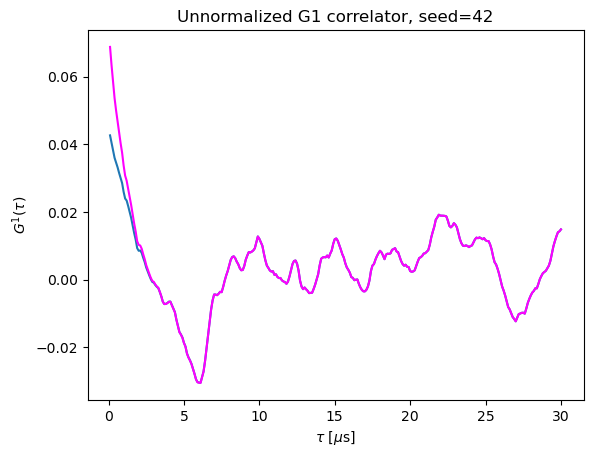

In [61]:
W = WienerProcess(0.,im*0., im*0.)
time_total = LinRange(0.0,1000.0,10000)
time1 = time_total[1:300]
dt = time[2] - time[1]
tau = 10*dt
Jhet = make_white_noise(time_total, W)#sqrt(2*κ)*a + conj(white_noise);
# println(mean(white_noise), " ", std(white_noise), " ", 1/sqrt(dt))
tau = dt*10
Jhetfilt = exp_filter(Jhet, tau, dt)
time_bins = 300
time2 = dt*collect(0:time_bins)
println(time1, time2)

two_point = real.(two_point_correlator(Jhetfilt, time_bins))

@. model(x,p) = p[1]*exp(-x*p[2])
fit = curve_fit(model, time1,two_point, [1/(dt)*(1 - exp(-dt/tau))^2/(1 - exp(-2*dt/tau)), 1/tau])

Background = exp.(-time/tau)*(1/(dt)*(1 - exp(-dt/tau))^2/(1 - exp(-2*dt/tau)))

rslt = confidence_interval(fit, 0.1)
println("Pre-factor Actual: $(rslt[1][1])-$(rslt[1][2]) \t Expected: $(1/(dt)*(1 - exp(-dt/tau))^2/(1 - exp(-2*dt/tau)))\n Decay time: $(rslt[2][1])-$(rslt[2][2]) \t Expected: $(1/tau)")

# println(fit.param[1]*dt*(1 - exp(-2*dt/tau))/(1 - exp(-dt/tau))^2)

# PyPlot.plot(time, two_point, label="White noise correlations")#  - Background
# PyPlot.plot(time, model(time, fit.param), label="Fit")
PyPlot.plot(time, two_point - model(time, fit.param), label="Fit")
# PyPlot.plot(time, Background)
PyPlot.plot(time, two_point_correlator(Jhetfilt, time_total, dt, time_bins) - Background, color=cm(λrel/λrels[end]), label="$(round(λrel,digits=2))")
# plot(time, two_point_correlator(Jhetfilt, tout, dt, time_bins) - two_point_correlator(exp_filter(conj(white_noise), tau, dt), tout, dt, time_bins))
xlabel(L"$\tau$ [$\mu$s]")
ylabel(L"$G^1 (\tau)$")
# # PyPlot.colorbar()
PyPlot.title("Unnormalized G1 correlator, seed=$(seed)")
PyPlot.display_figs()

In [16]:
sqrt(dt)

0.1

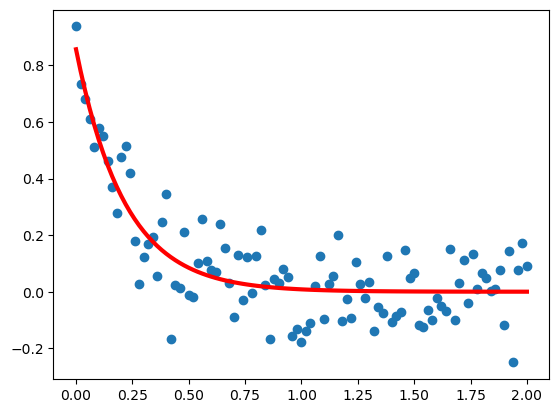

In [34]:
x = 0.0:0.02:2.0
@. model(x,p) = p[1]*exp(-x*p[2])
y0 = model(x, [1.0,5.0]) + randn(length(x))/10
fit = curve_fit(model, x, y0, [3.0, 4.0])
plot(x, y0, "o", x, model(x, fit.param), "r-", linewidth=3)
PyPlot.display_figs()

In [32]:
randn(10)

10-element Vector{Float64}:
  0.6345658318410885
  0.4788513433839891
  0.9116988900204264
  1.5144496536990073
 -0.008184933930706937
  0.8519974183251376
 -2.159844325870364
 -0.15772926329225284
 -0.8972555115543168
  0.06220449556135505

In [29]:
function lorenz!(du, u, p, t)
    du[1] = 10.0 * (u[2] - u[1])
    du[2] = u[1] * (28.0 - u[3]) - u[2]
    du[3] = u[1] * u[2] - (8 / 3) * u[3]
end

function σ_lorenz!(du, u, p, t)
    du[1] = 3.0
    du[2] = 3.0
    du[3] = 3.0
end

prob_sde_lorenz = SDEProblem(lorenz!, σ_lorenz!, [1.0, 0.0, 0.0], (0.0, 10.0))
sol = solve(prob_sde_lorenz)

retcode: Success
Interpolation: 1st order linear
t: 41425-element Vector{Float64}:
  0.0
  2.8588122172097503e-5
  3.4305746606517005e-5
  4.0738074095238946e-5
  4.7974442520051125e-5
  5.611535699796483e-5
  6.527388578561774e-5
  7.557723067172728e-5
  8.716849366860051e-5
  0.00010020866454008289
  ⋮
  9.996291272341141
  9.996808901913955
  9.997321988414516
  9.997830184594973
  9.998332565703002
  9.998833251262093
  9.999331515410034
  9.99982864588541
 10.0
u: 41425-element Vector{Vector{Float64}}:
 [1.0, 0.0, 0.0]
 [1.0129472967010278, 0.011081515658243848, -0.014178210426925112]
 [1.021584142468671, 0.004920615518097799, -0.004755071426715719]
 [1.0205860775290028, 0.009422178816987828, -0.014422939021685626]
 [1.0091467919787052, 0.008511055256020488, -0.02996221732888538]
 [1.007981909185223, 0.006597843467430617, -0.029630422815245673]
 [1.005025117255747, 0.007550398866895527, -0.02205781278847069]
 [1.0101325441539244, 0.012995171028138798, -0.02733801453177869]
 [0.997

In [30]:
sol.W

t: 2-element Vector{Float64}:
  0.0
 10.0
u: 2-element Vector{Vector{Float64}}:
 [0.0, 0.0, 0.0]
 [3.521028554272337, -2.045703066542202, -4.85727243206021]

In [28]:
rslt = load("MeanFieldRslts/seed=24lambda=0.0.jld2");
tout = rslt["SolArr"].t
rslt["WtArr"]

70099-element Vector{Float64}:
   0.0
   0.026180318567368313
   0.07228672704727512
   0.09267291409432026
   0.10487346357847681
   0.11503770456974302
   0.12504283699848087
   0.1356231559629287
   0.1460984826918414
   0.1547416029956155
   ⋮
 499.93681922377726
 499.94497246080965
 499.95314294591816
 499.9607216050035
 499.9680270506353
 499.97484619109065
 499.98114872312226
 499.9881948913432
 499.9952686713239

In [160]:
tout[2:end] - tout[1:end-1]

49999-element LinRange{Float64, Int64}:
 0.0100002, 0.0100002, 0.0100002, …, 0.0100002, 0.0100002, 0.0100002

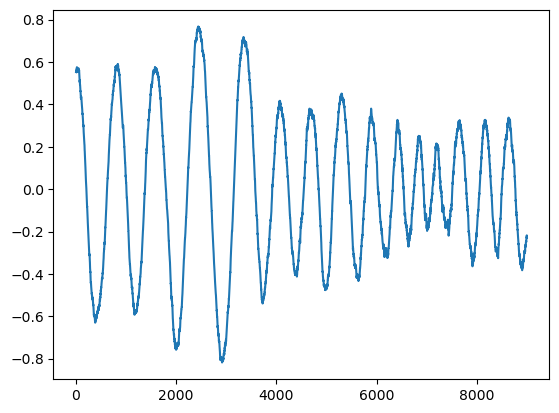

In [16]:
PyPlot.plot(real.(sol(sol.t, idxs=1).u)[1:9000])
PyPlot.display_figs()

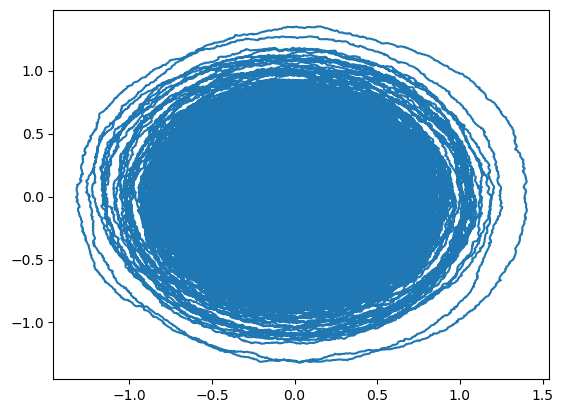

In [40]:
PyPlot.plot(real.(sol(sol.t, idxs=1).u), imag.(sol(sol.t, idxs=1).u))
PyPlot.display_figs()

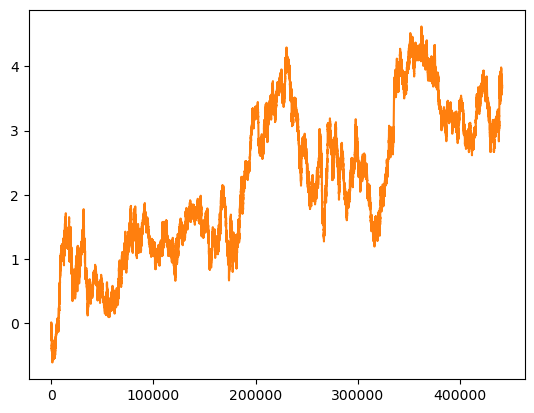

In [37]:
PyPlot.plot(W.u)
PyPlot.display_figs()

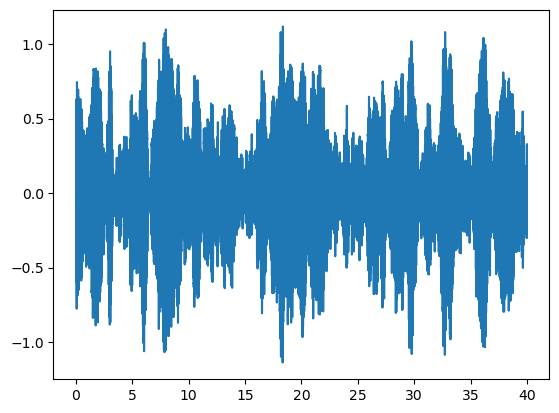

In [24]:
PyPlot.plot(sol.t, imag.(sol(sol.t, idxs=1).u))
PyPlot.display_figs()

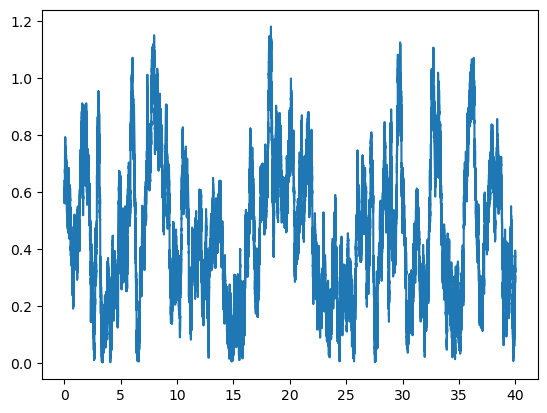

In [25]:
PyPlot.plot(sol.t, abs.(sol(sol.t, idxs=1).u))
PyPlot.display_figs()

In [20]:
cov(sol,2)

UndefVarError: UndefVarError: `cov` not defined

In [14]:
plot(sol, idxs = (Sx, Sy, Sz))

PyCall.PyError: PyError ($(Expr(:escape, :(ccall(#= C:\Users\henhen724\.julia\packages\PyCall\1gn3u\src\pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'AttributeError'>
AttributeError("Line2D.set() got an unexpected keyword argument 'idxs'")
  File "C:\Users\henhen724\anaconda3\Lib\site-packages\matplotlib\pyplot.py", line 2812, in plot
    return gca().plot(
           ^^^^^^^^^^^
  File "C:\Users\henhen724\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py", line 1688, in plot
    lines = [*self._get_lines(*args, data=data, **kwargs)]
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\henhen724\anaconda3\Lib\site-packages\matplotlib\axes\_base.py", line 311, in __call__
    yield from self._plot_args(
               ^^^^^^^^^^^^^^^^
  File "C:\Users\henhen724\anaconda3\Lib\site-packages\matplotlib\axes\_base.py", line 544, in _plot_args
    return [l[0] for l in result]
           ^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\henhen724\anaconda3\Lib\site-packages\matplotlib\axes\_base.py", line 544, in <listcomp>
    return [l[0] for l in result]
           ^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\henhen724\anaconda3\Lib\site-packages\matplotlib\axes\_base.py", line 537, in <genexpr>
    result = (make_artist(x[:, j % ncx], y[:, j % ncy], kw,
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\henhen724\anaconda3\Lib\site-packages\matplotlib\axes\_base.py", line 351, in _makeline
    seg = mlines.Line2D(x, y, **kw)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\henhen724\anaconda3\Lib\site-packages\matplotlib\_api\deprecation.py", line 454, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\henhen724\anaconda3\Lib\site-packages\matplotlib\lines.py", line 395, in __init__
    self._internal_update(kwargs)
  File "C:\Users\henhen724\anaconda3\Lib\site-packages\matplotlib\artist.py", line 1223, in _internal_update
    return self._update_props(
           ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\henhen724\anaconda3\Lib\site-packages\matplotlib\artist.py", line 1197, in _update_props
    raise AttributeError(


In [15]:
twopointreal = [sum([sol[j][1]sol[j+i][1] for j=1:length(sol)-i])/(length(sol)-i) for i=1:100]

100-element Vector{Float64}:
 99.87946544184463
 99.80616438258868
 99.7502843311344
 99.74398607285129
 99.78075634163767
 99.82795855011359
 99.85410652174482
 99.84872491093178
 99.8240981294751
 99.80100066003439
 99.79332856256957
 99.80097518502149
 99.81406914230358
  ⋮
 99.81716832960416
 99.81687227580991
 99.81590345879528
 99.81536889557837
 99.81580273190109
 99.81674502594417
 99.81739797412585
 99.81756119114971
 99.81710016173845
 99.81672333437545
 99.81657444671241
 99.81655037640594

In [ ]:
twopointimag = [sum([sol[j][2]sol[j+i][2] for j=1:length(sol)-i])/(length(sol)-i) for i=1:10000]

In [89]:
# savefig("two_point_graph.png")
plot(sol.t, twopointreal, ylab=L"\langle x(0)x(t) \rangle", xlab=L"t", label=L"\langle x(0)x(t) \rangle")

attempt to save state beyond implementation limit
attempt to save state beyond implementation limit


: 

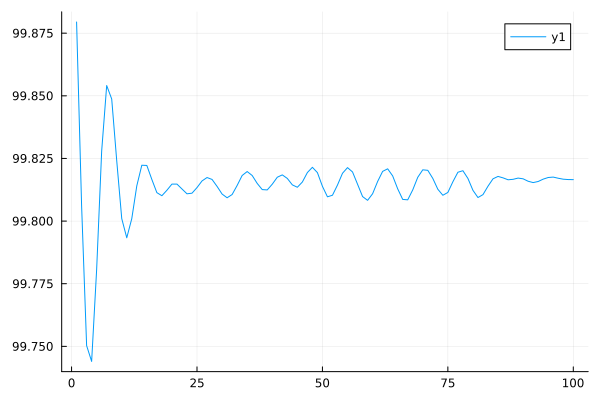

In [16]:
plot(twopointreal)

In [9]:
function save_correlators(Δ, ω, κ, g)
    # 1: (a+a^\dag)/2 
    # 2: i(a-a^\dag)/2 
    # 3: S_x 
    # 4: S_y 
    # 5: S_z
    #Δ = 1.0 # MHz
    #ω = 1.0 # MHz
    #κ = 0.01

    g_c = 1/2*sqrt(ω*(Δ^2 + κ^2)/Δ)

    if g > g_c
        inital = [g*Δ/(Δ^2 + κ^2), 0, 1.0, 0, (Δ^2 + κ^2)/Δ*ω/g^2]
    else
        inital = [0., 0., 1.0, 0., 0.]
    end

    function dicke(du, u, p, t)
        du[1] = Δ*u[2]-κ*u[1]
        du[2] = -Δ*u[1]-κ*u[2]+g*u[3]
        du[3] = -ω*u[4]
        du[4] = ω*u[3]+g*u[1]*u[5]
        du[5] = -g*u[1]*u[4]
    end

    function σ_dicke(du, u, p, t)
        du[1] = -sqrt(κ/2)
        du[2] = -sqrt(κ/2)
        du[3] = 0.
        du[4] = 0.
        du[5] = 0.
    end

    prob_sde_lorenz = SDEProblem(dicke, σ_dicke, inital, (0.0, 4000.0))
    sol = solve(prob_sde_lorenz)

    twopointxx = [sum([sol[j][1]sol[j+i][1] for j=1:length(sol)-i])/(length(sol)-i) for i=1:10000]
    twopointxy = [sum([sol[j][1]sol[j+i][2] for j=1:length(sol)-i])/(length(sol)-i) for i=1:10000]
    twopointyy = [sum([sol[j][2]sol[j+i][2] for j=1:length(sol)-i])/(length(sol)-i) for i=1:10000]
    
    JLD2.save_object("DickeRuns/d=$Δ w=$ω k=$κ g=$g xx.jld2", twopointxx)
    JLD2.save_object("DickeRuns/d=$Δ w=$ω k=$κ g=$g xy.jld2", twopointxy)
    JLD2.save_object("DickeRuns/d=$Δ w=$ω k=$κ g=$g yy.jld2", twopointyy)
end

save_correlators (generic function with 5 methods)

In [10]:
save_correlators(1.0, 1.0, 0.01, 0.01)

In [8]:
twopoint = zeros((7,100))
gs = 10 .^(LinRange(-3.,3.,7))
for i in 1:7
    gstr = @sprintf("%.3f", gs[i])
    xx = JLD2.load("DickeRuns/d=1.0 w=1.0 k=0.01 g=$gstr xx.jld2", "single_stored_object")
    yy = JLD2.load("DickeRuns/d=1.0 w=1.0 k=0.01 g=$gstr yy.jld2", "single_stored_object")
    twopoint[i] = xx + yy
end

LoadError: MethodError: [0mCannot `convert` an object of type [92mVector{Float64}[39m[0m to an object of type [91mFloat64[39m

[0mClosest candidates are:
[0m  convert(::Type{T}, [91m::Gray24[39m) where T<:Real
[0m[90m   @[39m [35mColorTypes[39m [90mC:\Users\blevl\.julia\packages\ColorTypes\1dGw6\src\[39m[90m[4mconversions.jl:114[24m[39m
[0m  convert(::Type{T}, [91m::Gray[39m) where T<:Real
[0m[90m   @[39m [35mColorTypes[39m [90mC:\Users\blevl\.julia\packages\ColorTypes\1dGw6\src\[39m[90m[4mconversions.jl:113[24m[39m
[0m  convert(::Type{T}, [91m::Union{Static.StaticBool{N}, Static.StaticFloat64{N}, Static.StaticInt{N}} where N[39m) where T<:Number
[0m[90m   @[39m [36mStatic[39m [90mC:\Users\blevl\.julia\packages\Static\dLrtk\src\[39m[90m[4mStatic.jl:414[24m[39m
[0m  ...


In [104]:
xx = JLD2.load("DickeRuns/d=1.0 w=1.0 k=0.01 g=0.400 xx.jld2", "single_stored_object")

100-element Vector{Float64}:
  0.07648918024769585
 -0.003718893877931769
 -0.0704660833722708
 -0.08339623579791795
 -0.04392169669442903
  0.012784576696366899
  0.04826177091382078
  0.04680829242680425
  0.020183497895500314
 -0.007539611772218276
 -0.019673752585730366
 -0.015748656041314757
 -0.005489025787350807
  ⋮
  0.00264234385188802
 -0.004157151949629308
 -0.007801085661048343
 -0.007209553059724432
 -0.003697928639061111
  0.0004122889359693749
  0.003448263099206801
  0.004962153722194812
  0.004913637402756266
  0.003221738411290282
  7.234775015552299e-5
 -0.003308214082533297

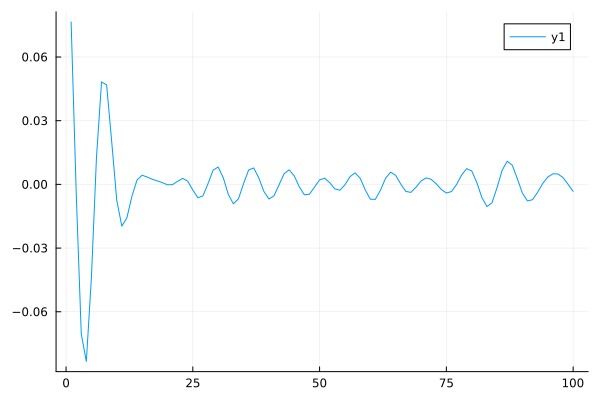

In [105]:
plot(xx)

In [37]:
# 1: (a+a^\dag)/2 
# 2: i(a-a^\dag)/2 
# 3: S_x 
# 4: S_y 
# 5: S_z
# 6: g(t)
# 7: t of last bang
Δ = 1.0 # MHz
ω = 1.0 # MHz
κ = 0.01
g_init = 0.5

g_c = 1/2*sqrt(ω*(Δ^2 + κ^2)/Δ)

# if g > g_c
#     inital = [g*Δ/(Δ^2 + κ^2), 0, 1.0, 0, (Δ^2 + κ^2)/Δ*ω/g^2]
# else
#     inital = [0., 0., 1.0, 0., 0.]
# end
angle = 2*pi*rand(Float64, 2)
angle[1] = angle[1] % pi
x = rand(Float64)
inital = [x,0., sin(angle[1]), cos(angle[1])*cos(angle[2]), cos(angle[1])*sin(angle[2]), g_init, 0.0]

t_last_bang = 0.0
cool_down_t = 10.0
max_x = 0.1

function dicke(du, u, p, t)
    if abs(u[1]) < max_x && t - u[7] > cool_down_t
        u[7] = t
        u[6] = -u[6]
    end

    du[1] = Δ*u[2]-κ*u[1]
    du[2] = -Δ*u[1]-κ*u[2]+g*u[3]
    du[3] = -ω*u[4]
    du[4] = ω*u[3]+g*u[1]*u[5]
    du[5] = -g*u[1]*u[4]
    du[6] = 0.0
    du[7] = 0.0
end

function σ_dicke(du, u, p, t)
    du[1] = -sqrt(κ/2)
    du[2] = -sqrt(κ/2)
    du[3] = 0.
    du[4] = 0.
    du[5] = 0.
    du[6] = 0.0
    du[7] = 0.0
end

prob_sde_lorenz = SDEProblem(dicke, σ_dicke, inital, (0.0, 4000.0))
sol = solve(prob_sde_lorenz, SKenCarp())

retcode: Success
Interpolation: 1st order linear
t: 5862-element Vector{Float64}:
    0.0
    0.005890140733836633
    0.012516549059402846
    0.019971258425664835
    0.028357806462709575
    0.03779267300438491
    0.04840689786376966
    0.060347900830577506
    0.07378152916823633
    0.08889436104810251
    0.10589629691295196
    0.1250234747609076
    0.1465415498398577
    ⋮
 3992.99596513313
 3993.8114408052097
 3994.4179853626943
 3995.100347989864
 3995.728387480952
 3996.434931908426
 3996.9896612429325
 3997.613731744252
 3998.2742169251865
 3999.0172627537377
 3999.683030669504
 4000.0
u: 5862-element Vector{Vector{Float64}}:
 [0.8635968503332846, 0.0, 0.8790675997750091, 0.27644444674129365, 0.3883537342316981, 0.5, 0.0]
 [0.8564440994099783, 0.0035883378262419243, 0.8774130529419665, 0.2855330462654868, 0.3855114929900105, 0.5, 0.0]
 [0.8472398627592413, 0.008087324986504439, 0.8754941444154994, 0.29566793525800633, 0.3822200086154904, 0.5, 0.0]
 [0.8459691525137187, 0

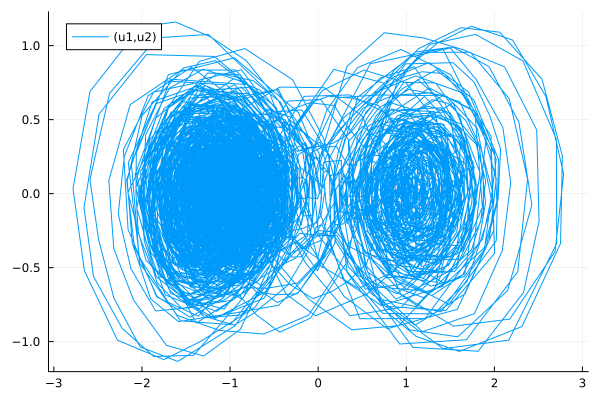

In [38]:
plot(sol, idxs = (1, 2))

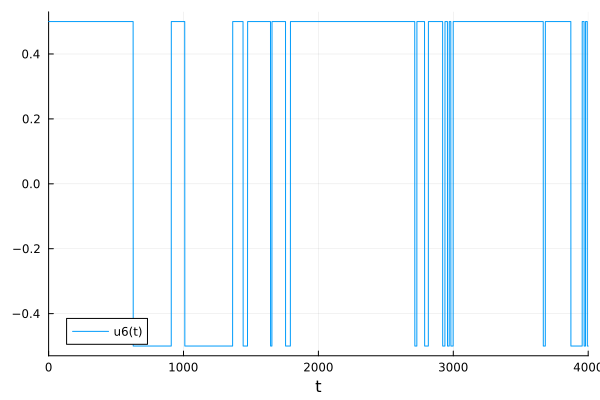

In [39]:
plot(sol, idxs = (6))